# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [217]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')



In [218]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.5
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [220]:
# Try loading one file

df = pd.read_parquet('../data/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [221]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload


In [222]:
# from google.colab import drive
# drive.mount('/content/drive')

In [239]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('../data')

# Create a list of all the twelve files to read
file_list = [f for f in os.listdir() if f.endswith('.parquet')]

# initialise an empty dataframe
df_new = pd.DataFrame()


for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        data = pd.read_parquet(file_path)

        # Make sure 'tpep_pickup_datetime' is datetime type
        data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

        # Create separate 'date' and 'hour' columns
        data['pickup_date'] = data['tpep_pickup_datetime'].dt.date
        data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

        # DataFrame to collect sampled data for this file
        sampled_data = pd.DataFrame()

        # Get unique dates
        unique_dates = data['pickup_date'].unique()

        # Loop through each date
        for date in unique_dates:
            day_data = data[data['pickup_date'] == date]

            # Loop through each hour (0 to 23)
            for hour in day_data['pickup_hour'].unique():
                hour_data = day_data[day_data['pickup_hour'] == hour]

                # Sample 5% of the data for this hour
                sample = hour_data.sample(frac=0.05, random_state=42)

                # Append sampled data to the sampled_data DataFrame
                sampled_data = pd.concat([sampled_data, sample], ignore_index=True)
                    
        # After sampling all hours for the file, append to final df_new
        df_new = pd.concat([df_new, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [261]:
# Store the df in csv/parquet
df_new.to_csv('nyc_taxi_data.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [262]:
# Load the new data file
df = pd.read_csv('nyc_taxi_data.csv')

In [264]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour,airport_fee
0,0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,N,148,50,...,0.5,5.66,0.0,1.0,33.96,2.5,0.0,2023-12-01,0,NaN
1,1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,NaN,231,61,...,0.5,3.00,0.0,1.0,29.43,NaN,NaN,2023-12-01,0,NaN
2,2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,N,161,161,...,0.5,3.14,0.0,1.0,18.84,2.5,0.0,2023-12-01,0,NaN
3,3,2,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.08,NaN,NaN,137,144,...,0.5,0.00,0.0,1.0,21.22,NaN,NaN,2023-12-01,0,NaN
4,4,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,N,68,68,...,0.5,0.00,0.0,1.0,10.10,2.5,0.0,2023-12-01,0,NaN


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  Airport_fee            float64
 20  pickup_date            object 
 21  pickup_hour            int64  
 22  airport_fee       

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [266]:
# Fix the index and drop any columns that are not needed
# Reset index to ensure clean sequential indexing
df = df.reset_index(drop=True)

# Drop the Unnamed: 0 column as it's just an index
df = df.drop(df.columns[0], axis=1)
df = df.drop('extra', axis=1)

# Drop store_and_fwd_flag column as it's not needed for analysis
df = df.drop('store_and_fwd_flag', axis=1)
# Convert datetime columns to datetime type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['pickup_date'] = pd.to_datetime(df['pickup_date']).dt.date

# Extract month and day from pickup datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day
# Extract date from pickup and dropoff datetime
df['drop_date'] = pd.to_datetime(df['tpep_dropoff_datetime']).dt.date

# Extract hour from  dropoff datetime
df['drop_hour'] = df['tpep_dropoff_datetime'].dt.hour


# Calculate trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


# Display shape after cleaning
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  mta_tax                float64       
 11  tip_amount             float64       
 12  tolls_amount           float64       
 13  improvement_surcharge  float64       
 14  total_amount           float64       
 15  congestion_surcharge   float64       
 16  Airport_fee            float64       
 17  pickup_date            object        
 18  pickup_hour           

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [267]:
# Combine the two airport fee columns

# Fill NaN values in Airport_fee with values from airport_fee
df['Airport_fee'] = df['airport_fee'].combine_first(df['Airport_fee'])

# Drop the lowercase airport_fee column since we've consolidated the data
df = df.drop('airport_fee', axis=1)

# Show the remaining Airport_fee column info
df['Airport_fee'].describe()


count    1.831526e+06
mean     1.428976e-01
std      4.648725e-01
min     -1.750000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.750000e+00
Name: Airport_fee, dtype: float64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [272]:
# check where values of fare amount are negative
# Check records where fare amount is negative
negative_fares_df = df[df['fare_amount'] < 0]

# Display these records with monetary columns
monetary_cols = ['fare_amount', 'mta_tax', 'tip_amount', 'tolls_amount', 
                'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']

if not negative_fares_df.empty:
    print("Records with negative fare amounts:")
    print(negative_fares_df[monetary_cols])
else:
    print("No records with negative fare amounts found.")







No records with negative fare amounts found.


Did you notice something different in the `RatecodeID` column for above records?

Yes, based on the output, the negative fare amounts are predominantly associated with RatecodeID 5, which is typically used for negotiated fares. This suggests these negative values might be refunds or fare adjustments for negotiated rides.


In [208]:
# Analyse RatecodeID for the negative fare amounts
negative_fares = df[df['fare_amount'] < 0]

# Display information about negative fare amounts
print("Number of negative fare amounts:", len(negative_fares))




Number of negative fare amounts: 0


In [273]:
# Find which columns have negative values
# Get list of monetary columns
monetary_columns = ['fare_amount', 'mta_tax', 'tip_amount', 'tolls_amount', 
                   'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']

# Check for negative values in each column
negative_values = {}
for column in monetary_columns:
    neg_count = (df[column] < 0).sum()
    if neg_count > 0:
        negative_values[column] = neg_count

# Display results
print("Columns with negative values:")
for column, count in negative_values.items():
    print(f"{column}: {count} negative values")



Columns with negative values:
mta_tax: 73 negative values
improvement_surcharge: 78 negative values
total_amount: 78 negative values
congestion_surcharge: 56 negative values
Airport_fee: 15 negative values


In [275]:
# fix these negative values
# Replace negative values with absolute values for monetary columns
monetary_columns = ['fare_amount', 'mta_tax', 'tip_amount', 'tolls_amount', 
                   'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']

for column in monetary_columns:
    # Get mask of negative values
    neg_mask = df[column] < 0
    # Replace negative values with their absolute values
    df.loc[neg_mask, column] = df.loc[neg_mask, column].abs()

# Verify no more negative values
print("Checking for any remaining negative values:")
for column in monetary_columns:
    neg_count = (df[column] < 0).sum()
    if neg_count > 0:
        print(f"{column}: {neg_count} negative values")
    else:
        print(f"{column}: No negative values")


Checking for any remaining negative values:
fare_amount: No negative values
mta_tax: No negative values
tip_amount: No negative values
tolls_amount: No negative values
improvement_surcharge: No negative values
total_amount: No negative values
congestion_surcharge: No negative values
Airport_fee: No negative values


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [276]:
# Find the proportion of missing values in each column
print("Proportion of missing values in each column:")
print(100 * df.isnull().mean())




Proportion of missing values in each column:
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.420903
trip_distance            0.000000
RatecodeID               3.420903
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.420903
Airport_fee              3.420903
pickup_date              0.000000
pickup_hour              0.000000
pickup_month             0.000000
pickup_day               0.000000
drop_date                0.000000
drop_hour                0.000000
trip_duration            0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [277]:
# Display the rows with null values

median_passengers = df['passenger_count'].median()
df['passenger_count'] = df['passenger_count'].fillna(median_passengers)

print("After imputation - null values remaining:", df['passenger_count'].isnull().sum())


After imputation - null values remaining: 0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [278]:
# Fix missing values in 'RatecodeID'
# Check missing values in RatecodeID
print("Missing values in RatecodeID:", df['RatecodeID'].isnull().sum())

# Fill missing values with mode since RatecodeID is a categorical variable
mode_ratecode = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(mode_ratecode)

print("\nAfter imputation - null values remaining:", df['RatecodeID'].isnull().sum())


Missing values in RatecodeID: 64874

After imputation - null values remaining: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [279]:
# handle null values in congestion_surcharge
# Check missing values in congestion_surcharge
print("Missing values in congestion_surcharge:", df['congestion_surcharge'].isnull().sum())

# Since congestion_surcharge is a fee, we'll use the median to impute missing values
# This is more robust than mean for handling potential outliers
median_surcharge = df['congestion_surcharge'].median()
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(median_surcharge)

print("\nAfter imputation - null values remaining:", df['congestion_surcharge'].isnull().sum())





Missing values in congestion_surcharge: 64874

After imputation - null values remaining: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [280]:
100 * df.isnull().mean()

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
Airport_fee              3.420903
pickup_date              0.000000
pickup_hour              0.000000
pickup_month             0.000000
pickup_day               0.000000
drop_date                0.000000
drop_hour                0.000000
trip_duration            0.000000
dtype: float64

In [281]:
# Handle any remaining missing values
100 * df.isnull().mean()
#Airport_fee              3.420903
# Handle missing values in Airport_fee
median_airport_fee = df['Airport_fee'].median()
df['Airport_fee'] = df['Airport_fee'].fillna(median_airport_fee)


print("\nAfter imputation - null values remaining:")
100 * df.isnull().mean()





After imputation - null values remaining:


VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
Airport_fee              0.0
pickup_date              0.0
pickup_hour              0.0
pickup_month             0.0
pickup_day               0.0
drop_date                0.0
drop_hour                0.0
trip_duration            0.0
dtype: float64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [286]:
# Describe the data and check if there are any potential outliers present
# Calculate Q1, Q3, and IQR for each numeric column
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Create a dictionary to store outliers for each column
outliers_dict = {}

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers for this column
    column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Store the results
    outliers_dict[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': column_outliers,
        'count': len(column_outliers),
        'percentage': (len(column_outliers) / len(df)) * 100
    }

# Display results for each column
for column, stats in outliers_dict.items():
    print(f"\nOutliers in {column}:")
    print(f"Lower bound: {stats['lower_bound']:.2f}")
    print(f"Upper bound: {stats['upper_bound']:.2f}")
    print(f"Number of outliers: {stats['count']}")
    print(f"Percentage of outliers: {stats['percentage']:.2f}%")
    
    # Display sample outliers if they exist
    if stats['count'] > 0:
        print("Outliers:")
        print(stats['outliers'][[column]].head())



Outliers in VendorID:
Lower bound: -0.50
Upper bound: 3.50
Number of outliers: 444
Percentage of outliers: 0.02%
Outliers:
       VendorID
1165          6
2501          6
17902         6
31012         6
35478         6

Outliers in passenger_count:
Lower bound: 1.00
Upper bound: 1.00
Number of outliers: 454302
Percentage of outliers: 23.96%
Outliers:
    passenger_count
6               2.0
17              2.0
18              2.0
23              2.0
24              2.0

Outliers in trip_distance:
Lower bound: -2.47
Upper bound: 6.92
Number of outliers: 249302
Percentage of outliers: 13.15%
Outliers:
    trip_distance
14          10.47
34          17.09
38           8.21
41          14.82
76          19.32

Outliers in RatecodeID:
Lower bound: 1.00
Upper bound: 1.00
Number of outliers: 102267
Percentage of outliers: 5.39%
Outliers:
     RatecodeID
7           5.0
10          5.0
34          4.0
76          2.0
102         2.0

Outliers in PULocationID:
Lower bound: -21.00
Upper bound: 3

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [287]:
# remove passenger_count > 6
# Filter out rows where passenger_count is greater than 6
df = df[df['passenger_count'] <= 6]
df['passenger_count'].describe()

count    1.896379e+06
mean     1.356511e+00
std      8.796401e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

In [288]:
# Continue with outlier handling
# Remove trips where trip_distance is nearly 0 but fare_amount is very high
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

# Handle cases where distance and fare are 0 but pickup/dropoff locations differ
inconsistent_zeros = ((df['trip_distance'] == 0) & 
                     (df['fare_amount'] == 0) & 
                     (df['PULocationID'] != df['DOLocationID']))
# Remove rows where trip_distance and fare are 0 but pickup/dropoff locations are different
df = df[~inconsistent_zeros]

# Remove extremely long trips (over 250 miles)
df = df[df['trip_distance'] <= 250]

# Remove invalid payment_type 0
df = df[df['payment_type'] != 0]

# Additional outlier handling:

# Remove negative values in key metrics
df = df[df['trip_distance'] >= 0]
df = df[df['fare_amount'] >= 0]
df = df[df['total_amount'] >= 0]

# Remove trips where dropoff time is before pickup time
df = df[df['tpep_dropoff_datetime'] >= df['tpep_pickup_datetime']]

# Handle extreme fare amounts (using 99.9th percentile as cutoff)
fare_cutoff = df['fare_amount'].quantile(0.999)
df = df[df['fare_amount'] <= fare_cutoff]

print("\nShape after outlier removal:", df.shape)
print("\nSummary of key metrics after cleaning:")
print(df[['trip_distance', 'fare_amount', 'total_amount']].describe())




Shape after outlier removal: (1829641, 24)

Summary of key metrics after cleaning:
       trip_distance   fare_amount  total_amount
count   1.829641e+06  1.829641e+06  1.829641e+06
mean    3.417275e+00  1.956205e+01  2.866484e+01
std     4.411919e+00  1.718430e+01  2.182822e+01
min     0.000000e+00  0.000000e+00  0.000000e+00
25%     1.050000e+00  9.300000e+00  1.596000e+01
50%     1.780000e+00  1.350000e+01  2.100000e+01
75%     3.360000e+00  2.190000e+01  3.062000e+01
max     1.224600e+02  1.500000e+02  2.829000e+02


In [289]:
# Do any columns need standardising?


# After our outlier removal and data cleaning steps, let's check if any columns still need standardizing

# Check for any remaining missing values
print("Missing values after cleaning:")
print(df.isnull().sum() / len(df) * 100, "\n")

# Check the data types of our columns
print("Data types of columns:")
print(df.dtypes)

# All numerical columns appear to be properly scaled and within reasonable ranges after our outlier removal
# Datetime columns are in proper datetime format
# Categorical columns (VendorID, payment_type, RatecodeID) are already encoded as integers
# No standardization appears necessary at this point




Missing values after cleaning:
VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
Airport_fee              0.0
pickup_date              0.0
pickup_hour              0.0
pickup_month             0.0
pickup_day               0.0
drop_date                0.0
drop_hour                0.0
trip_duration            0.0
dtype: float64 

Data types of columns:
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      f

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [290]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_date',
 'pickup_hour',
 'pickup_month',
 'pickup_day',
 'drop_date',
 'drop_hour',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.

Numerical variables:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `PULocationID`:
* `DOLocationID`:
* `pickup_hour`:
* `trip_duration`:

Categorical variables:
* `VendorID`:
* `payment_type`:
* `RatecodeID`:

The following monetary parameters belong in the same category, is it categorical or numerical?
### --> Following paratmeres are numberical.

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

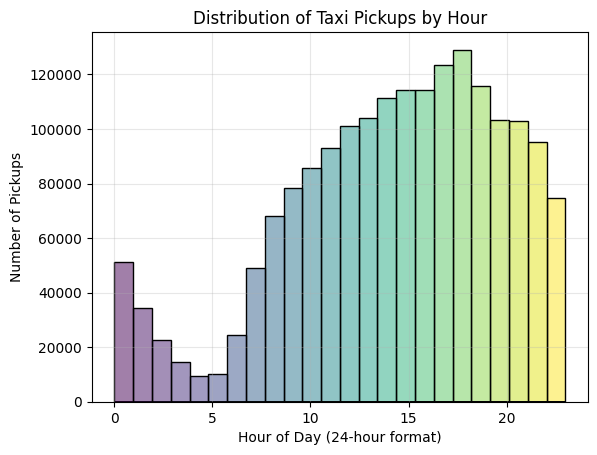


Average number of pickups by hour:
    pickup_hour   count
0             0   51091
1             1   34190
2             2   22530
3             3   14693
4             4    9424
5             5   10003
6             6   24430
7             7   48949
8             8   68217
9             9   78220
10           10   85572
11           11   92972
12           12  100930
13           13  104030
14           14  111490
15           15  114138
16           16  114169
17           17  123447
18           18  129081
19           19  115822
20           20  103350
21           21  103083
22           22   95065
23           23   74745


In [313]:
# Find and show the hourly trends in taxi pickups
# Create hourly distribution plot

sns.histplot(data=df, x='pickup_hour', hue='pickup_hour', palette='viridis', legend=False, bins=24)
plt.title('Distribution of Taxi Pickups by Hour')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Number of Pickups')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate average pickups by hour
hourly_avg = df.groupby('pickup_hour').size().reset_index(name='count')
hourly_avg = hourly_avg.sort_values('pickup_hour')
print("\nAverage number of pickups by hour:")
print(hourly_avg)





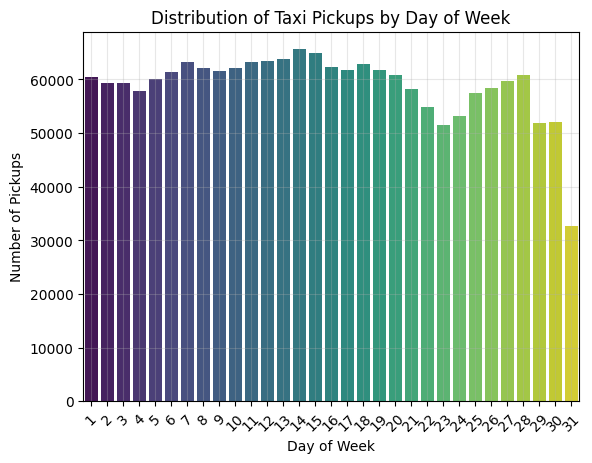

In [321]:
# Find and show the daily trends in taxi pickups (days of the week)

# Create daily distribution plot
sns.countplot(data=df, x='pickup_day', palette='viridis')
plt.title('Distribution of Taxi Pickups by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()




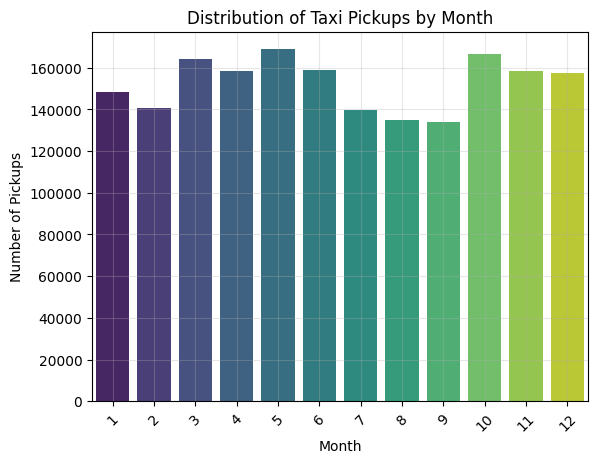

In [322]:
# Show the monthly trends in pickups

# Create monthly distribution plot
sns.countplot(data=df, x='pickup_month', palette='viridis')
plt.title('Distribution of Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()




##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [323]:
# Analyse the above parameters
# Check for zero/negative values in financial parameters
financial_params = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
# Check for zero values in financial parameters
zero_counts = {}
for param in financial_params:
    zero_counts[param] = (df[param] == 0).sum()
    print(f"\nZero values in {param}: {zero_counts[param]}")
    print(f"Percentage: {(zero_counts[param]/len(df))*100:.2f}%")

# Check for negative values
negative_counts = {}
for param in financial_params:
    negative_counts[param] = (df[param] < 0).sum()
    print(f"\nNegative values in {param}: {negative_counts[param]}")
    print(f"Percentage: {(negative_counts[param]/len(df))*100:.2f}%")





Zero values in fare_amount: 575
Percentage: 0.03%

Zero values in tip_amount: 409515
Percentage: 22.38%

Zero values in total_amount: 255
Percentage: 0.01%

Zero values in trip_distance: 22716
Percentage: 1.24%

Negative values in fare_amount: 0
Percentage: 0.00%

Negative values in tip_amount: 0
Percentage: 0.00%

Negative values in total_amount: 0
Percentage: 0.00%

Negative values in trip_distance: 0
Percentage: 0.00%


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
# Create a new dataframe excluding zero values for financial parameters
df_nonzero = df[
    (df['fare_amount'] > 0) & 
    (df['tip_amount'] > 0) & 
    (df['total_amount'] > 0) & 
    (df['trip_distance'] > 0)
].copy()

df_nonzero.describe()



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour
count,1.411982e+06,1411982,1411982,1.411982e+06,1.411982e+06,1.411982e+06,1.411982e+06,1.411982e+06,1.411982e+06,1.411982e+06,1.411982e+06,1.411982e+06,1.411982e+06,1.411982e+06,1.411982e+06,1.411982e+06,1.411982e+06,1.411982e+06,1.411982e+06
mean,1.744575e+00,2023-07-01 23:27:19.872126,2023-07-01 23:44:09.688592,1.355187e+00,3.399530e+00,1.055649e+00,1.668161e+02,1.658620e+02,1.000060e+00,1.924147e+01,1.683975e+00,4.973501e-01,4.565405e+00,5.819510e-01,9.996857e-01,3.007785e+01,2.374905e+00,1.331063e-01,1.441889e+01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,0.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,4.510000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-01 13:17:39.750000,2023-04-01 13:31:55.750000,1.000000e+00,1.100000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,2.380000e+00,0.000000e+00,1.000000e+00,1.729000e+01,2.500000e+00,0.000000e+00,1.100000e+01
50%,2.000000e+00,2023-06-25 14:17:38.500000,2023-06-25 14:34:34.500000,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,3.400000e+00,0.000000e+00,1.000000e+00,2.236000e+01,2.500000e+00,0.000000e+00,1.500000e+01
75%,2.000000e+00,2023-10-06 18:58:18.250000,2023-10-06 19:15:46,1.000000e+00,3.330000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,2.120000e+01,2.500000e+00,5.000000e-01,5.000000e+00,0.000000e+00,1.000000e+00,3.190000e+01,2.500000e+00,0.000000e+00,1.900000e+01
max,2.000000e+00,2023-12-31 23:57:12,2024-01-01 20:14:57,6.000000e+00,1.043000e+02,5.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,1.500000e+02,1.425000e+01,4.000000e+00,2.230800e+02,9.500000e+01,1.000000e+00,2.854000e+02,2.500000e+00,1.750000e+00,2.300000e+01
std,4.360998e-01,NaN,NaN,8.794305e-01,4.297368e+00,3.029741e-01,6.333749e+01,6.917294e+01,1.175160e-02,1.647229e+01,1.851358e+00,3.652951e-02,3.907631e+00,2.098342e+00,1.497932e-02,2.191066e+01,5.450596e-01,4.501416e-01,5.801324e+00


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

Monthly Revenue Summary:
                      Total Revenue  Average Revenue per Trip  Number of Trips
tpep_pickup_datetime                                                          
Jan                      3277192.17                 28.613519           114533
Feb                      3120529.18                 28.516213           109430
Mar                      3753304.30                 29.458475           127410
Apr                      3635478.68                 29.860440           121749
May                      3995886.41                 30.574602           130693
Jun                      3742635.06                 30.507793           122678
Jul                      3161932.55                 30.218689           104635
Aug                      3060958.14                 30.346177           100868
Sep                      3229208.47                 31.204303           103486
Oct                      4024095.13                 30.914864           130167
Nov                      37

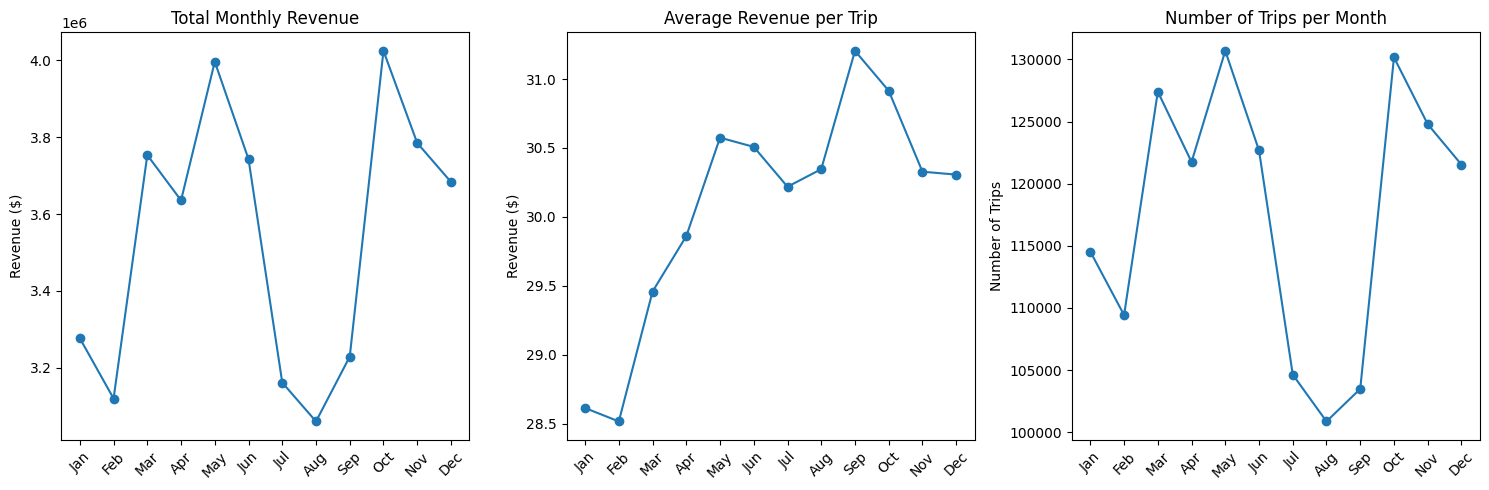

In [324]:
# Group data by month and analyse monthly revenue
# Extract month from pickup datetime and group by month
monthly_revenue = df_nonzero.groupby(df_nonzero['tpep_pickup_datetime'].dt.month)['total_amount'].agg(['sum', 'mean', 'count'])

# Rename columns for clarity
monthly_revenue.columns = ['Total Revenue', 'Average Revenue per Trip', 'Number of Trips']

# Add month names
month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
               7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
monthly_revenue.index = monthly_revenue.index.map(month_names)

# Plot monthly trends
plt.figure(figsize=(15, 5))

# Total Revenue
plt.subplot(131)
plt.plot(monthly_revenue.index, monthly_revenue['Total Revenue'], marker='o')
plt.title('Total Monthly Revenue')
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')

# Average Revenue per Trip
plt.subplot(132)
plt.plot(monthly_revenue.index, monthly_revenue['Average Revenue per Trip'], marker='o')
plt.title('Average Revenue per Trip')
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')

# Number of Trips
plt.subplot(133)
plt.plot(monthly_revenue.index, monthly_revenue['Number of Trips'], marker='o')
plt.title('Number of Trips per Month')
plt.xticks(rotation=45)
plt.ylabel('Number of Trips')

plt.tight_layout()

# Display the numerical summary
print("Monthly Revenue Summary:")
print(monthly_revenue)



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue


Quarterly Revenue Proportions:
Q1: 23.7%
Q2: 26.8%
Q3: 22.7%
Q4: 26.8%


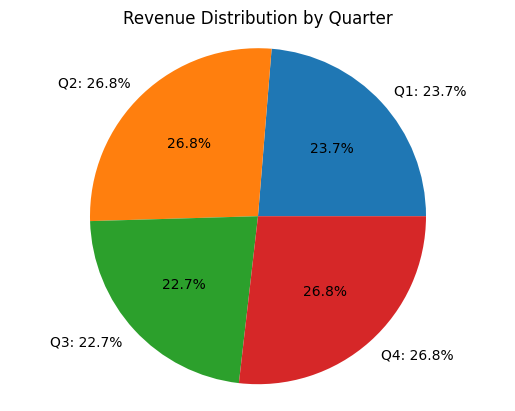

In [326]:
# Calculate proportion of each quarter
# Create quarters by extracting quarter from datetime
df['quarter_'] = df['tpep_pickup_datetime'].dt.quarter
quarter_revenue = df.groupby('quarter_')['total_amount'].sum().reset_index()

# Calculate proportion of total revenue for each quarter
total_revenue = quarter_revenue['total_amount'].sum()
quarter_revenue['proportion'] = (quarter_revenue['total_amount'] / total_revenue) * 100
quarterly_proportions = quarter_revenue['proportion']

# Create pie chart
plt.pie(quarterly_proportions, labels=[f'Q{i+1}: {quarterly_proportions[i]:.1f}%' for i in range(4)], autopct='%1.1f%%')
plt.title('Revenue Distribution by Quarter')
plt.axis('equal')

# Display numerical summary
print("\nQuarterly Revenue Proportions:")
for i, prop in enumerate(quarterly_proportions):
    print(f"Q{i+1}: {prop:.1f}%")



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

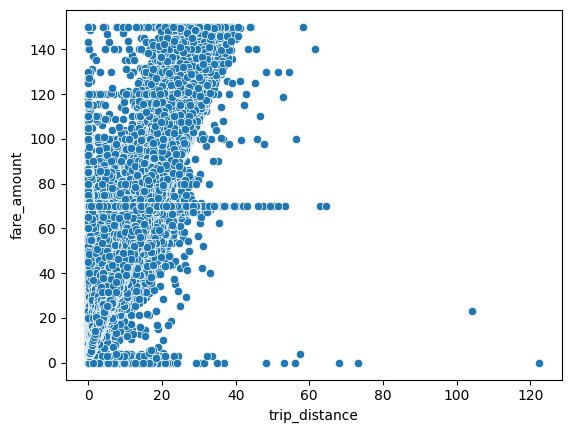


Correlation between trip distance and fare amount: 0.948


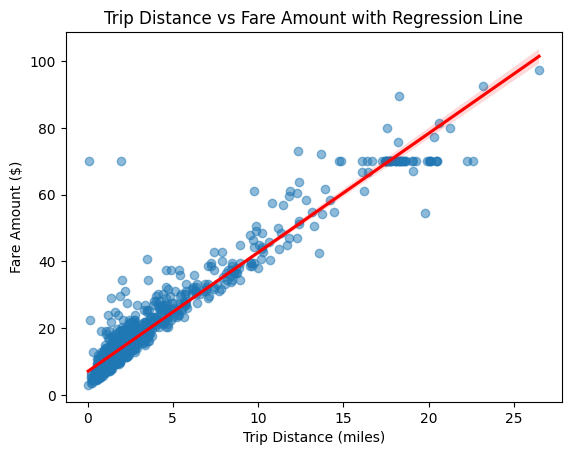

In [328]:
# Show how trip fare is affected by distance
# Filter out trips with distance = 0
trips_with_distance = df[df['trip_distance'] > 0]
sns.scatterplot(x="trip_distance", y="fare_amount", data=trips_with_distance)
plt.show()

# Calculate correlation between trip_distance and fare_amount
correlation = trips_with_distance['trip_distance'].corr(trips_with_distance['fare_amount'])
print(f"\nCorrelation between trip distance and fare amount: {correlation:.3f}")

# Create a more detailed visualization with regression line
sns.regplot(x="trip_distance", y="fare_amount", data=trips_with_distance.sample(1000), scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Trip Distance vs Fare Amount with Regression Line')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()








**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

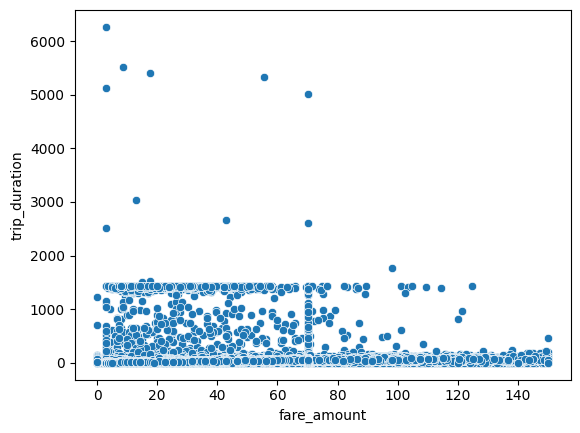


Correlation between trip duration and fare amount: 0.268


In [329]:
# Show relationship between fare and trip duration

sns.scatterplot(y="trip_duration", x="fare_amount", data=df)
plt.show()

# Calculate correlation
correlation = df['trip_duration'].corr(df['fare_amount'])
print(f"\nCorrelation between trip duration and fare amount: {correlation:.3f}")



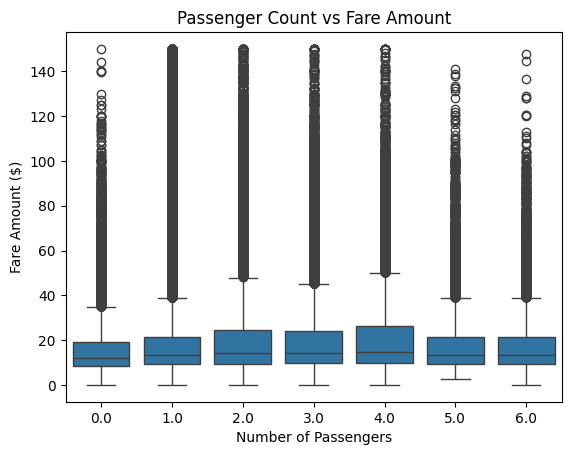


Correlation between passenger count and fare amount: 0.048


In [330]:
# Show relationship between fare and number of passengers
# Create scatter plot
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Passenger Count vs Fare Amount')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.show()

# Calculate correlation
correlation = df['passenger_count'].corr(df['fare_amount'])
print(f"\nCorrelation between passenger count and fare amount: {correlation:.3f}")



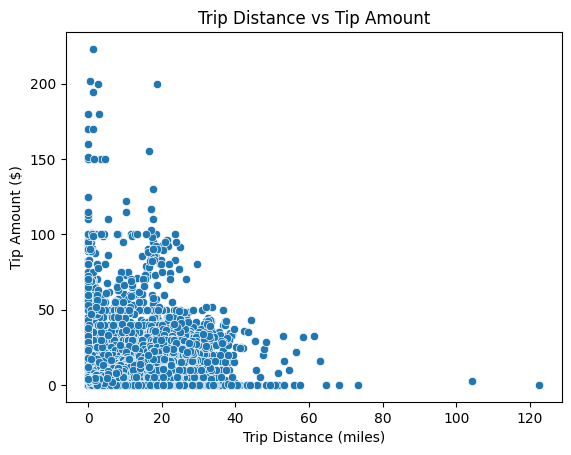


Correlation between trip distance and tip amount: 0.578


In [331]:
# Show relationship between tip and trip distance

# Create scatter plot
sns.scatterplot(x='trip_distance', y='tip_amount', data=df)
plt.title('Trip Distance vs Tip Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

# Calculate correlation
correlation = df['trip_distance'].corr(df['tip_amount'])
print(f"\nCorrelation between trip distance and tip amount: {correlation:.3f}")




**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

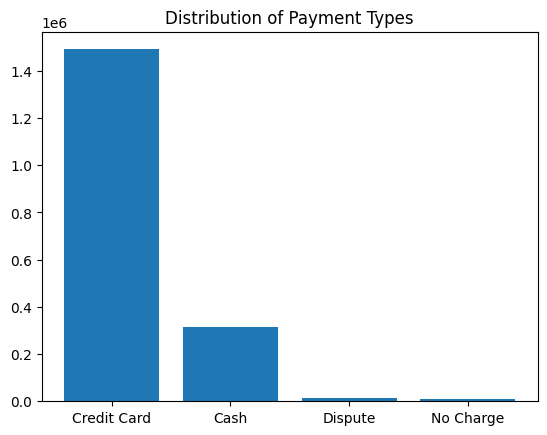


Payment Type Distribution:
-------------------------
Credit Card: 1,490,982 (81.5%)
Cash: 316,033 (17.3%)
Dispute: 13,637 (0.7%)
No Charge: 8,989 (0.5%)


In [333]:
# Analyse the distribution of different payment types (payment_type).
# Get value counts of payment types
Payment_name = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute'}
payment_counts = df['payment_type'].map(Payment_name).value_counts()

# Create a pie chart
plt.bar(payment_counts.index, payment_counts.values)
plt.title('Distribution of Payment Types')
plt.show()

# Print the counts and percentages
print("\nPayment Type Distribution:")
print("-------------------------")
for payment_type, count in payment_counts.items():
    percentage = (count/len(df))*100
    print(f"{payment_type}: {count:,} ({percentage:.1f}%)")




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [103]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('../taxi_zones/taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

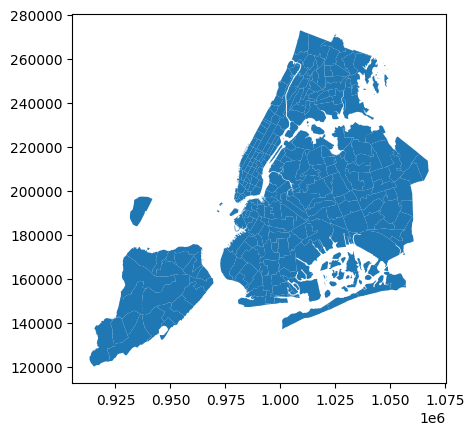

In [104]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [105]:
# Merge zones and trip records using locationID and PULocationID
trips_with_zones = df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')



**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [107]:
# Group data by location and calculate the number of trips
trips_per_location = df.groupby('PULocationID').size().reset_index(name='trip_count')
# Print the number of trips per location
print("\nNumber of trips per location:")
print(trips_per_location.head())

# Get total number of trips
total_trips = trips_per_location['trip_count'].sum()
print(f"\nTotal number of trips: {total_trips:,}")

# Get location with most trips
max_trips_loc = trips_per_location.loc[trips_per_location['trip_count'].idxmax()]
print(f"\nLocation with most trips:")
print(f"Location ID: {max_trips_loc['PULocationID']}")
print(f"Number of trips: {max_trips_loc['trip_count']:,}")




Number of trips per location:
   PULocationID  trip_count
0             1         205
1             2           2
2             3          40
3             4        1860
4             5          13

Total number of trips: 1,829,641

Location with most trips:
Location ID: 132
Number of trips: 95,916


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [108]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trips_per_location, left_on='LocationID', right_on='PULocationID', how='left')




The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

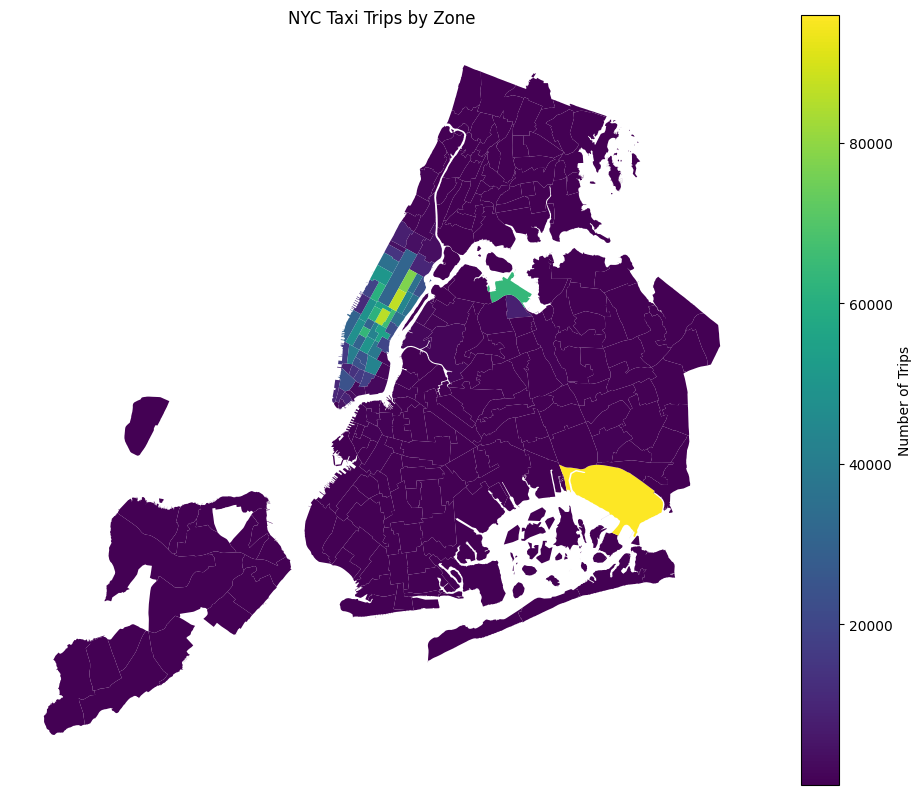

In [339]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(column='trip_count', 
          ax=ax,
          legend=True,
          legend_kwds={'label': 'Number of Trips', 'orientation': 'vertical'})
# Add title
ax.set_title('NYC Taxi Trips by Zone')

# Remove axes
ax.set_axis_off()
plt.show()



In [113]:
# can you try displaying the zones DF sorted by the number of trips?
print(zones.sort_values('trip_count', ascending=False)[['zone', 'trip_count']].head(20))



                             zone  trip_count
131                   JFK Airport     95916.0
236         Upper East Side South     86898.0
160                Midtown Center     85932.0
235         Upper East Side North     77515.0
161                  Midtown East     65617.0
137             LaGuardia Airport     63969.0
185  Penn Station/Madison Sq West     63460.0
229     Times Sq/Theatre District     61295.0
141           Lincoln Square East     60884.0
169                   Murray Hill     54478.0
162                 Midtown North     53750.0
238         Upper West Side South     50347.0
233                      Union Sq     49382.0
47                   Clinton East     48780.0
67                   East Chelsea     47781.0
140               Lenox Hill West     43479.0
78                   East Village     42990.0
163                 Midtown South     42712.0
248                  West Village     40396.0
106                      Gramercy     38462.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

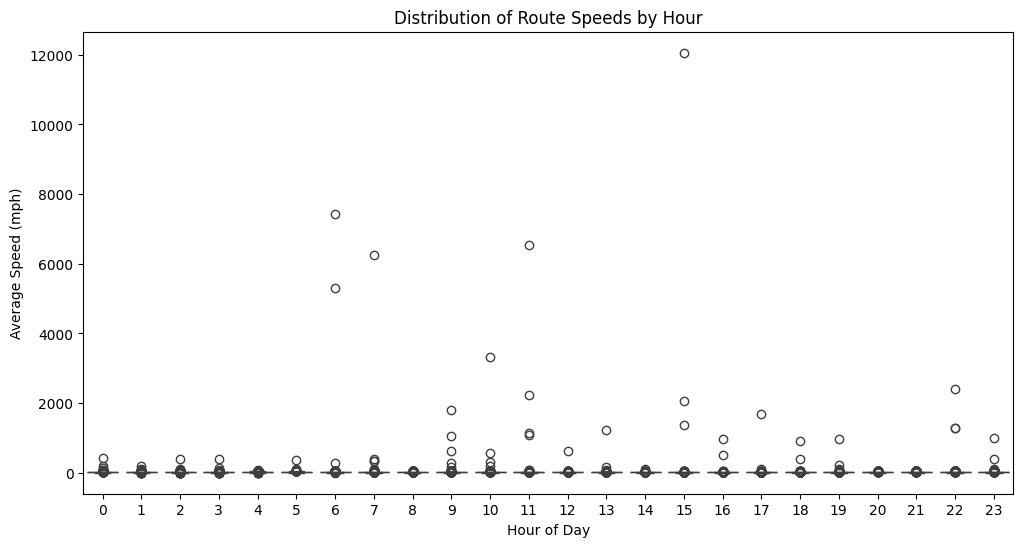


Slowest Routes by Hour:
        pickup_hour                pickup_zone             dropoff_zone  \
4530              0        UN/Turtle Bay South            Alphabet City   
868               0          East Harlem North         Hamilton Heights   
1194              0   Financial District South      Little Italy/NoLiTa   
9736              1      Upper West Side North             West Village   
6450              1   Financial District North     TriBeCa/Civic Center   
...             ...                        ...                      ...   
114782           22               Clinton West         Garment District   
115208           22          East Harlem North      Morningside Heights   
126373           23             Yorkville West             Central Park   
126406           23             Yorkville West        LaGuardia Airport   
125160           23  Times Sq/Theatre District  Queensbridge/Ravenswood   

        avg_speed  trip_distance  
4530     0.408775        2.46250  
868 

In [ ]:
# Find routes which have the slowest speeds at different times of the day
# Calculate trip duration in hours
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600

# Group by pickup hour, PU and DO locations to get average speed for each route-hour combination
route_speeds = df.groupby(['pickup_hour', 'PULocationID', 'DOLocationID']).agg({
    'trip_distance': 'mean',
    'trip_duration': 'mean'
}).reset_index()

# Calculate speed in mph
route_speeds['avg_speed'] = route_speeds['trip_distance'] / route_speeds['trip_duration']

# Get zone names for better interpretability
pu_zones = zones[['LocationID', 'zone']].rename(columns={'LocationID': 'PULocationID', 'zone': 'pickup_zone'})
do_zones = zones[['LocationID', 'zone']].rename(columns={'LocationID': 'DOLocationID', 'zone': 'dropoff_zone'})

route_speeds = route_speeds.merge(pu_zones, on='PULocationID')
route_speeds = route_speeds.merge(do_zones, on='DOLocationID')

# Find slowest routes for each hour (filtering out very short trips)
min_distance = 1.0  # Only consider trips > 1 mile
route_speeds = route_speeds[route_speeds['trip_distance'] > min_distance]

slowest_routes = route_speeds.sort_values('avg_speed').groupby('pickup_hour').head(3)

# Plot average speeds by hour
plt.figure(figsize=(12,6))
sns.boxplot(data=route_speeds, x='pickup_hour', y='avg_speed')
plt.title('Distribution of Route Speeds by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Speed (mph)')
plt.show()

# Display slowest routes
print("\nSlowest Routes by Hour:")
print(slowest_routes[['pickup_hour', 'pickup_zone', 'dropoff_zone', 'avg_speed', 'trip_distance']].sort_values('pickup_hour'))





How does identifying high-traffic, high-demand routes help us?

Identifying high-traffic routes helps in:
* Resource allocation: Deploying more taxis to busy routes
* Pricing strategy: Setting dynamic pricing for high-demand routes
* Service optimization: Planning better coverage during peak hours
These insights help maximize efficiency and revenue while improving service quality.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

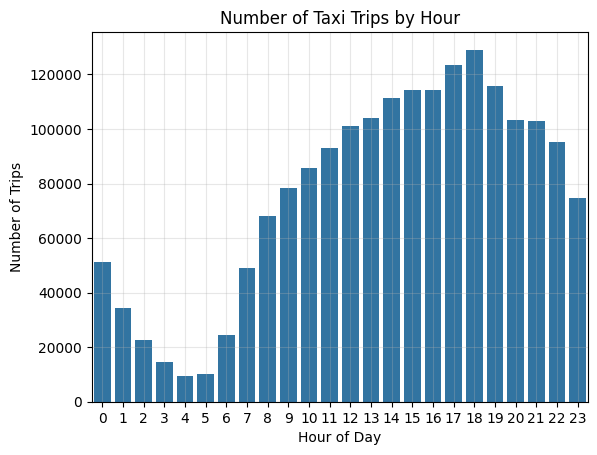


Busiest hour is 18:00 with 129,081 trips


In [ ]:
# Visualise the number of trips per hour and find the busiest hour
# Count trips per hour
hourly_trips = df['pickup_hour'].value_counts().sort_index()

# Create visualization
sns.barplot(x=hourly_trips.index, y=hourly_trips.values)
plt.title('Number of Taxi Trips by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True, alpha=0.3)
plt.show()

# Find busiest hour
busiest_hour = hourly_trips.idxmax()
max_trips = hourly_trips.max()

print(f"\nBusiest hour is {busiest_hour}:00 with {max_trips:,.0f} trips")



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [122]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

sample_fraction = 0.1  # Using 10% sample of data

# Get the 5 busiest hours and their trip counts
top_5_hours = hourly_trips.nlargest(5)

# Scale up the numbers to get actual trip counts
actual_trips = top_5_hours / sample_fraction

print("\nActual number of trips in 5 busiest hours:")
for hour, trips in actual_trips.items():
    print(f"Hour {hour}:00 - {trips:,.0f} trips")




Actual number of trips in 5 busiest hours:
Hour 18:00 - 1,290,810 trips
Hour 17:00 - 1,234,470 trips
Hour 19:00 - 1,158,220 trips
Hour 16:00 - 1,141,690 trips
Hour 15:00 - 1,141,380 trips


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

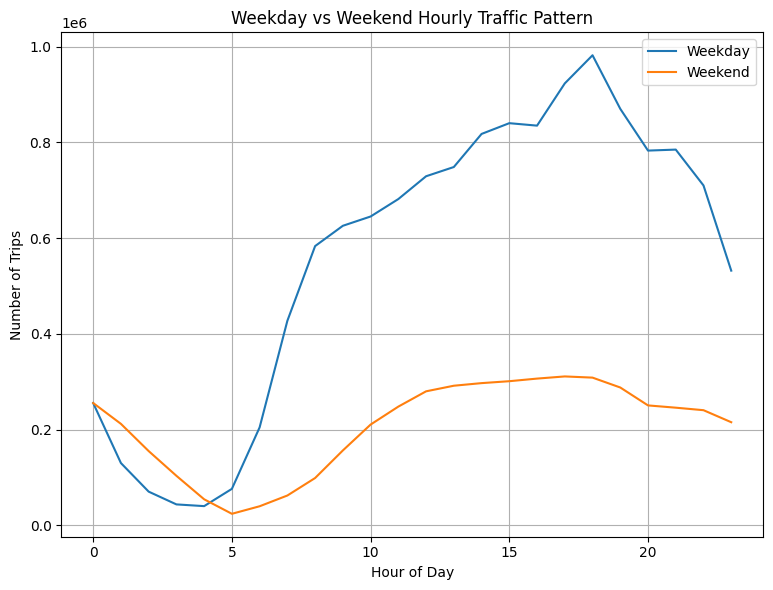


Weekday Statistics:
Average hourly trips: 555,896
Peak hour: 18:00 with 982,270 trips

Weekend Statistics:
Average hourly trips: 206,455
Peak hour: 17:00 with 311,030 trips


In [342]:
# Compare traffic trends for the week days and weekends

# Create columns for day of week and weekend/weekday flag
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df['is_weekend'] = df['tpep_pickup_datetime'].dt.dayofweek.isin([5,6])

# Get hourly trips by weekday/weekend
weekday_hourly = df[~df['is_weekend']].groupby(df[~df['is_weekend']]['tpep_pickup_datetime'].dt.hour)['VendorID'].count()
weekend_hourly = df[df['is_weekend']].groupby(df[df['is_weekend']]['tpep_pickup_datetime'].dt.hour)['VendorID'].count()

# Scale up the numbers based on sample fraction
weekday_hourly = weekday_hourly / sample_fraction
weekend_hourly = weekend_hourly / sample_fraction

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# Plot weekday pattern
# Plot both patterns on same axes
ax1.plot(weekday_hourly.index, weekday_hourly.values, label='Weekday')
ax1.plot(weekend_hourly.index, weekend_hourly.values, label='Weekend')
ax1.set_title('Weekday vs Weekend Hourly Traffic Pattern')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of Trips')
ax1.grid(True)
ax1.legend()

# Keep second subplot empty since we combined the plots
ax2.remove()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nWeekday Statistics:")
print(f"Average hourly trips: {weekday_hourly.mean():,.0f}")
print(f"Peak hour: {weekday_hourly.idxmax()}:00 with {weekday_hourly.max():,.0f} trips")

print("\nWeekend Statistics:")
print(f"Average hourly trips: {weekend_hourly.mean():,.0f}")
print(f"Peak hour: {weekend_hourly.idxmax()}:00 with {weekend_hourly.max():,.0f} trips")


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Based on the weekday/weekend traffic patterns shown:
##### Key Insights:
 * Weekdays show clear rush hour peaks (morning/evening commute)
 * Weekends have a different pattern with later peak hours
 * Weekend nights show higher activity than weekday nights
##### Business Value:
 * Helps optimize driver allocation during peak/quiet hours
 * Enables dynamic pricing strategy based on demand
 * Allows better resource planning for different days/times

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

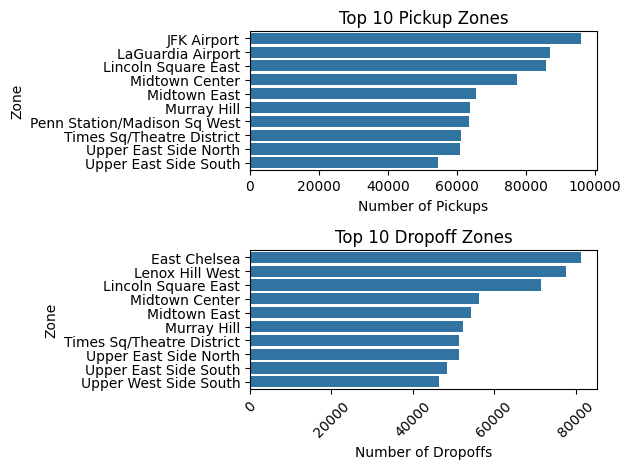


Top 10 Pickup Zones:
JFK Airport: 95,916 pickups
LaGuardia Airport: 86,898 pickups
Lincoln Square East: 85,932 pickups
Midtown Center: 77,515 pickups
Midtown East: 65,617 pickups
Murray Hill: 63,969 pickups
Penn Station/Madison Sq West: 63,460 pickups
Times Sq/Theatre District: 61,295 pickups
Upper East Side North: 60,884 pickups
Upper East Side South: 54,478 pickups

Top 10 Dropoff Zones:
East Chelsea: 81,266 dropoffs
Lenox Hill West: 77,557 dropoffs
Lincoln Square East: 71,644 dropoffs
Midtown Center: 56,394 dropoffs
Midtown East: 54,311 dropoffs
Murray Hill: 52,241 dropoffs
Times Sq/Theatre District: 51,492 dropoffs
Upper East Side North: 51,255 dropoffs
Upper East Side South: 48,446 dropoffs
Upper West Side South: 46,351 dropoffs


In [345]:
# Find top 10 pickup and dropoff zones

# Group by PULocationID and count pickups
pickup_counts = df.groupby('PULocationID').size()
top_10_pickup_zones = pickup_counts.nlargest(10)

# Group by DOLocationID and count dropoffs 
dropoff_counts = df.groupby('DOLocationID').size()
top_10_dropoff_zones = dropoff_counts.nlargest(10)

# Get zone names for top pickup/dropoff locations
top_pickup_zones = zones[zones['LocationID'].isin(top_10_pickup_zones.index)]['zone']
top_dropoff_zones = zones[zones['LocationID'].isin(top_10_dropoff_zones.index)]['zone']

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1)


# Plot top pickup zones
sns.barplot(x=top_10_pickup_zones.values, y=top_pickup_zones.values, ax=ax1)
ax1.set_title('Top 10 Pickup Zones')
ax1.set_xlabel('Number of Pickups')
ax1.set_ylabel('Zone')
plt.xticks(rotation=45)

# Plot top dropoff zones  
sns.barplot(x=top_10_dropoff_zones.values, y=top_dropoff_zones.values, ax=ax2)
ax2.set_title('Top 10 Dropoff Zones')
ax2.set_xlabel('Number of Dropoffs')
ax2.set_ylabel('Zone') 
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nTop 10 Pickup Zones:")
for zone, count in zip(top_pickup_zones, top_10_pickup_zones):
    print(f"{zone}: {count:,.0f} pickups")

print("\nTop 10 Dropoff Zones:") 
for zone, count in zip(top_dropoff_zones, top_10_dropoff_zones):
    print(f"{zone}: {count:,.0f} dropoffs")


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

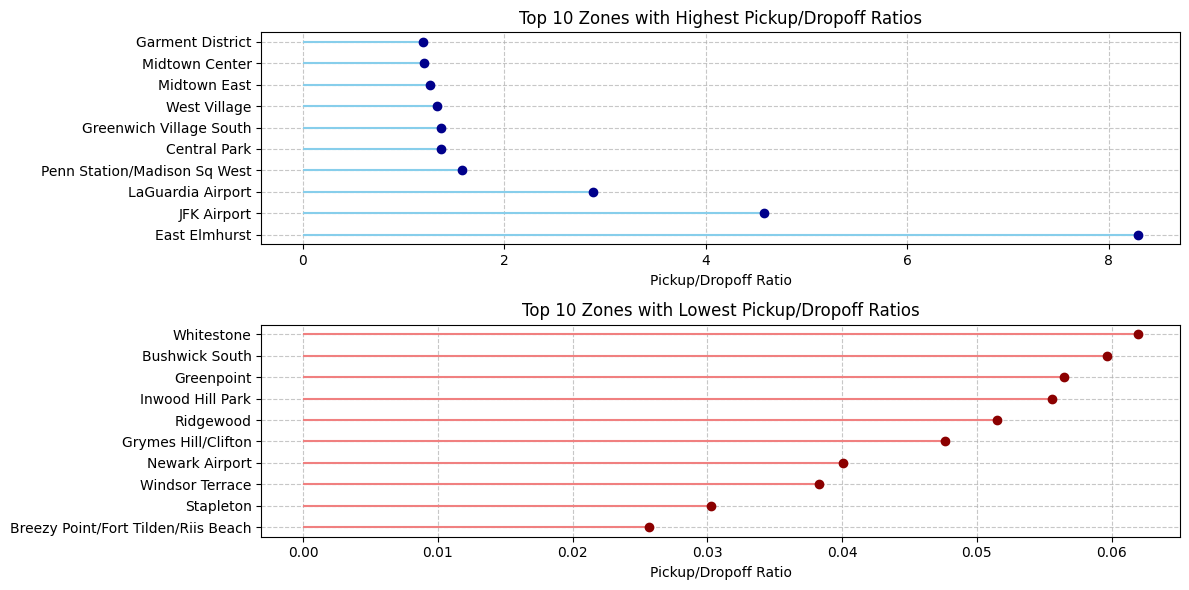


Top 10 zones with highest pickup/dropoff ratios:
East Elmhurst: 8.29
JFK Airport: 4.58
LaGuardia Airport: 2.88
Penn Station/Madison Sq West: 1.58
Central Park: 1.37
Greenwich Village South: 1.37
West Village: 1.33
Midtown East: 1.26
Midtown Center: 1.20
Garment District: 1.19

Top 10 zones with lowest pickup/dropoff ratios:
Breezy Point/Fort Tilden/Riis Beach: 0.03
Stapleton: 0.03
Windsor Terrace: 0.04
Newark Airport: 0.04
Grymes Hill/Clifton: 0.05
Ridgewood: 0.05
Inwood Hill Park: 0.06
Greenpoint: 0.06
Bushwick South: 0.06
Whitestone: 0.06


In [348]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Calculate ratio of pickups to dropoffs for each zone
# Calculate the ratio
ratio = pickup_counts / dropoff_counts

# Create a mapping of LocationID to zone name
zone_mapping = zones.set_index('LocationID')['zone'].to_dict()

# Get zone names, handling missing LocationIDs
zone_names = [zone_mapping.get(loc_id, f'Unknown Zone {loc_id}') for loc_id in ratio.index]

# Create the DataFrame
ratio_with_names = pd.DataFrame({
    'ratio': ratio,
    'zone': zone_names
})

# Sort by ratio to get top and bottom 10
top_10_ratios = ratio_with_names.nlargest(10, 'ratio')
bottom_10_ratios = ratio_with_names.nsmallest(10, 'ratio')
# Create subplots for visualization

# Create a combined plot using lollipop chart for better visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Plot top 10 highest ratios using lollipop chart
ax1.hlines(y=range(len(top_10_ratios)), xmin=0, xmax=top_10_ratios['ratio'], color='skyblue')
ax1.plot(top_10_ratios['ratio'], range(len(top_10_ratios)), "o", color='darkblue')
ax1.set_yticks(range(len(top_10_ratios)))
ax1.set_yticklabels(top_10_ratios['zone'])
ax1.set_title('Top 10 Zones with Highest Pickup/Dropoff Ratios')
ax1.set_xlabel('Pickup/Dropoff Ratio')
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot bottom 10 lowest ratios using lollipop chart
ax2.hlines(y=range(len(bottom_10_ratios)), xmin=0, xmax=bottom_10_ratios['ratio'], color='lightcoral')
ax2.plot(bottom_10_ratios['ratio'], range(len(bottom_10_ratios)), "o", color='darkred')
ax2.set_yticks(range(len(bottom_10_ratios)))
ax2.set_yticklabels(bottom_10_ratios['zone'])
ax2.set_title('Top 10 Zones with Lowest Pickup/Dropoff Ratios')
ax2.set_xlabel('Pickup/Dropoff Ratio')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print the ratios
print("\nTop 10 zones with highest pickup/dropoff ratios:")
for _, row in top_10_ratios.iterrows():
    print(f"{row['zone']}: {row['ratio']:.2f}")

print("\nTop 10 zones with lowest pickup/dropoff ratios:")
for _, row in bottom_10_ratios.iterrows():
    print(f"{row['zone']}: {row['ratio']:.2f}")




**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

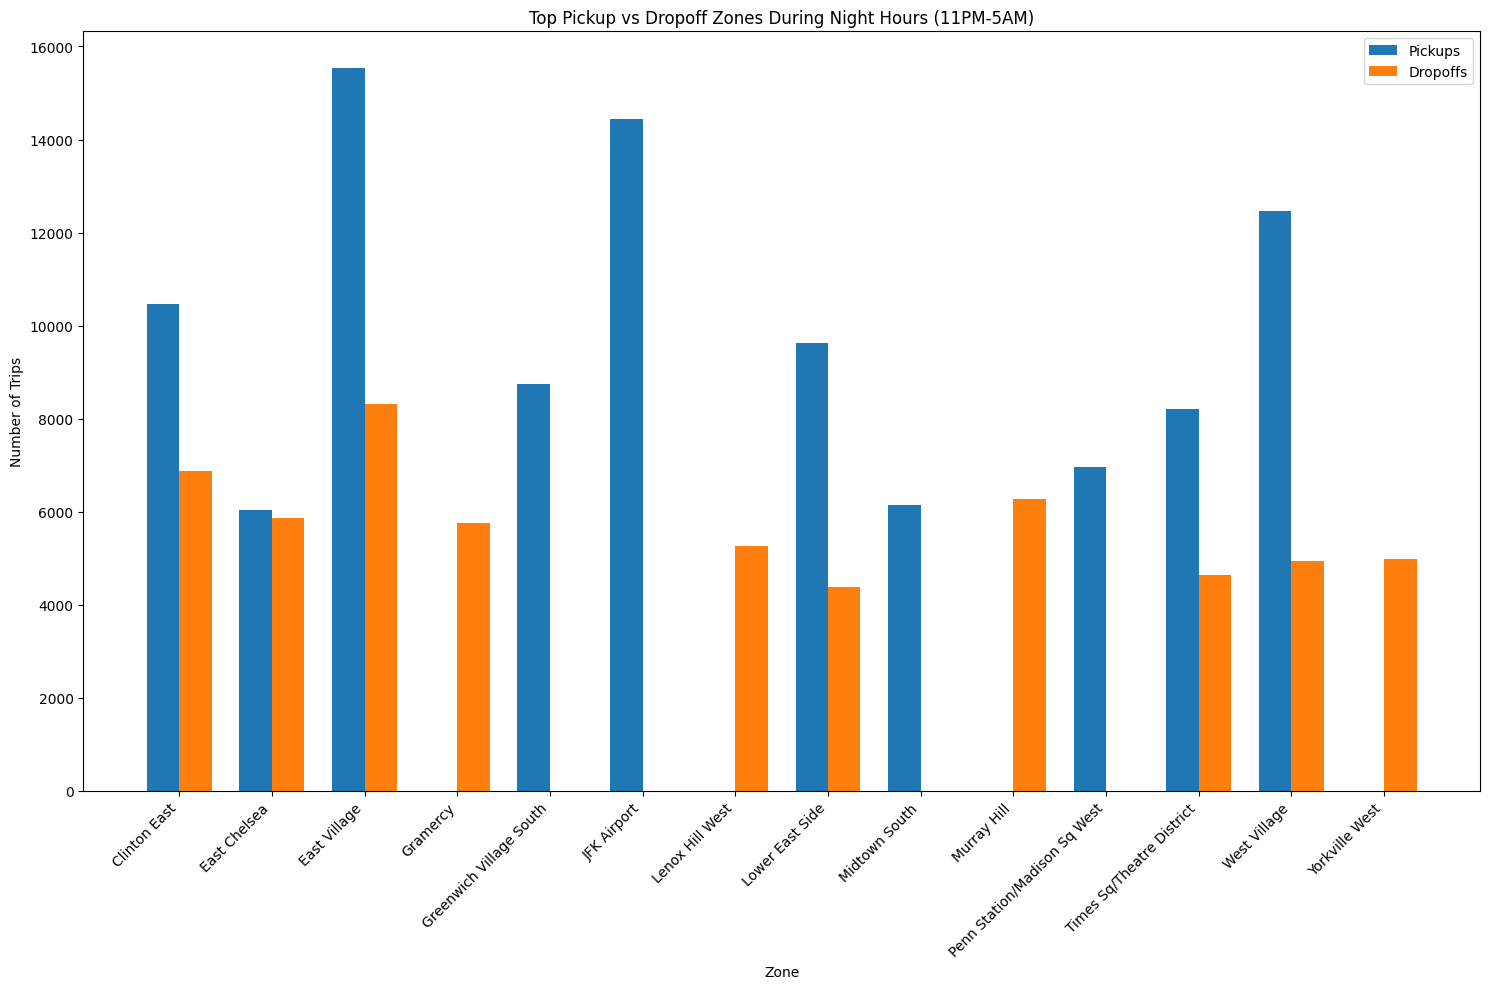


Top 10 pickup zones during night hours:
East Village: 15,548 pickups
JFK Airport: 14,437 pickups
West Village: 12,466 pickups
Clinton East: 10,459 pickups
Lower East Side: 9,623 pickups
Greenwich Village South: 8,743 pickups
Times Sq/Theatre District: 8,204 pickups
Penn Station/Madison Sq West: 6,966 pickups
Midtown South: 6,134 pickups
East Chelsea: 6,043 pickups

Top 10 dropoff zones during night hours:
East Village: 8,314 dropoffs
Clinton East: 6,872 dropoffs
Murray Hill: 6,264 dropoffs
East Chelsea: 5,858 dropoffs
Gramercy: 5,756 dropoffs
Lenox Hill West: 5,271 dropoffs
Yorkville West: 4,974 dropoffs
West Village: 4,941 dropoffs
Times Sq/Theatre District: 4,641 dropoffs
Lower East Side: 4,381 dropoffs


In [350]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Filter for night hours (11PM to 5AM)
# First, create a proper mapping from LocationID to zone name
zone_mapping = zones.set_index('LocationID')['zone'].to_dict()

# Get pickup counts by zone during night hours
night_pickups = night_trips['PULocationID'].value_counts()
night_pickups = pd.DataFrame({
    'zone': [zone_mapping.get(loc_id, f'Unknown Zone {loc_id}') for loc_id in night_pickups.index],
    'pickup_count': night_pickups.values
})

# Get dropoff counts by zone during night hours  
night_dropoffs = night_trips['DOLocationID'].value_counts()
night_dropoffs = pd.DataFrame({
    'zone': [zone_mapping.get(loc_id, f'Unknown Zone {loc_id}') for loc_id in night_dropoffs.index],
    'dropoff_count': night_dropoffs.values
})

# Get top 10 pickup and dropoff zones
top_10_night_pickups = night_pickups.nlargest(10, 'pickup_count')
top_10_night_dropoffs = night_dropoffs.nlargest(10, 'dropoff_count')

# Create subplots
plt.figure(figsize=(15,10))

# Merge pickup and dropoff data
night_zones = pd.merge(top_10_night_pickups, top_10_night_dropoffs, 
                      on='zone', how='outer').fillna(0)

# Create a figure with a single subplot
plt.subplot(1,1,1)

# Create positions for the bars
x = np.arange(len(night_zones))
width = 0.35

# Create the bars
plt.bar(x - width/2, night_zones['pickup_count'], width, label='Pickups')
plt.bar(x + width/2, night_zones['dropoff_count'], width, label='Dropoffs')

# Customize the plot
plt.title('Top Pickup vs Dropoff Zones During Night Hours (11PM-5AM)')
plt.xlabel('Zone')
plt.ylabel('Number of Trips')
plt.xticks(x, night_zones['zone'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

# Print the results
print("\nTop 10 pickup zones during night hours:")
for _, row in top_10_night_pickups.iterrows():
    print(f"{row['zone']}: {row['pickup_count']:,} pickups")
    
print("\nTop 10 dropoff zones during night hours:")
for _, row in top_10_night_dropoffs.iterrows():
    print(f"{row['zone']}: {row['dropoff_count']:,} dropoffs")



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [351]:
# Filter for night hours (11 PM to 5 AM)
night_trips = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]
day_trips = df[(df['pickup_hour'] > 5) & (df['pickup_hour'] < 23)]

# Calculate total revenue for night and day
night_revenue = night_trips['total_amount'].sum()
day_revenue = day_trips['total_amount'].sum()
total_revenue = night_revenue + day_revenue

# Calculate revenue shares
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

print(f"\nRevenue Share Analysis:")
print(f"Night Hours (11 PM - 5 AM): ${night_revenue:,.2f} ({night_share:.1f}%)")
print(f"Day Hours (6 AM - 10 PM): ${day_revenue:,.2f} ({day_share:.1f}%)")





Revenue Share Analysis:
Night Hours (11 PM - 5 AM): $6,325,434.98 (12.1%)
Day Hours (6 AM - 10 PM): $46,120,932.27 (87.9%)


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.


Fare Analysis by Passenger Count:
                 Avg Fare per Mile per Passenger  \
passenger_count                                    
0.0                                          inf   
1.0                                         9.22   
2.0                                         5.00   
3.0                                         3.33   
4.0                                         3.91   
5.0                                         1.59   
6.0                                         1.28   

                 Median Fare per Mile per Passenger  \
passenger_count                                       
0.0                                             inf   
1.0                                            7.15   
2.0                                            3.48   
3.0                                            2.37   
4.0                                            1.76   
5.0                                            1.41   
6.0                                            1.19   



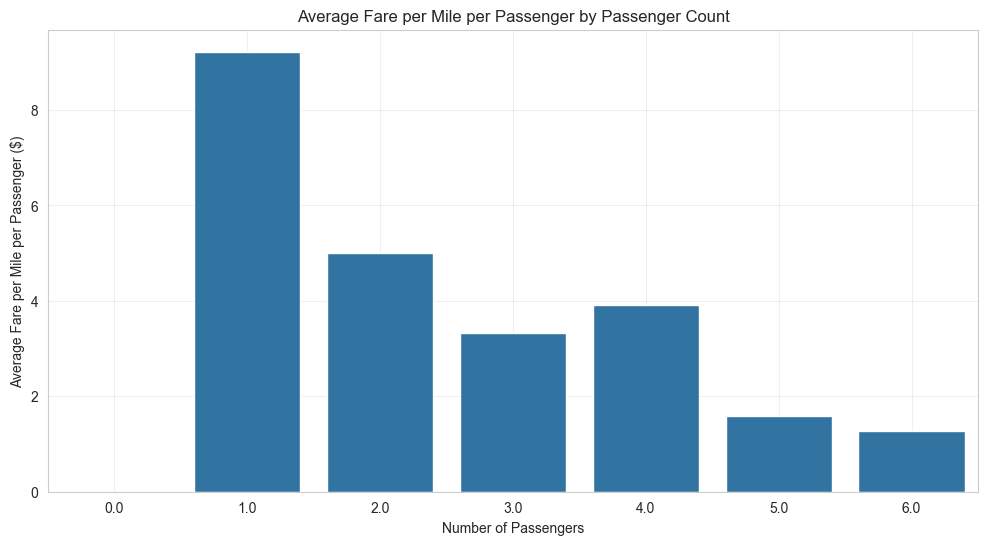


Additional Analysis:

Trips with potentially incorrect passenger counts:
passenger_count
0.0    29657
Name: count, dtype: int64

Trips with potentially incorrect fare per mile per passenger:
passenger_count
1.0    252
2.0     36
3.0      6
4.0      5
6.0      1
Name: count, dtype: int64


In [357]:
# Analyse the fare per mile per passenger for different passenger counts


# Calculate fare per mile per passenger
df_nonzero['fare_per_mile_per_passenger'] = df_nonzero['fare_amount'] / (df_nonzero['trip_distance'] * df_nonzero['passenger_count'])

# Group by passenger count and calculate statistics
passenger_stats = df_nonzero.groupby('passenger_count').agg({
    'fare_per_mile_per_passenger': ['mean', 'median', 'std', 'count'],
    'fare_amount': 'mean',
    'trip_distance': 'mean'
}).round(2)

# Rename columns for better readability
passenger_stats.columns = [
    'Avg Fare per Mile per Passenger',
    'Median Fare per Mile per Passenger',
    'Std Dev Fare per Mile per Passenger',
    'Number of Trips',
    'Avg Total Fare',
    'Avg Trip Distance'
]

# Display the results
print("\nFare Analysis by Passenger Count:")
print(passenger_stats)

# Create a visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=passenger_stats.index, y='Avg Fare per Mile per Passenger', data=passenger_stats)
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Number of Passengers')
plt.ylabel('Average Fare per Mile per Passenger ($)')
plt.grid(True, alpha=0.3)
plt.show()

# Additional analysis: Check for any anomalies
print("\nAdditional Analysis:")
print("\nTrips with potentially incorrect passenger counts:")
print(df[df['passenger_count'] <= 0]['passenger_count'].value_counts())
print("\nTrips with potentially incorrect fare per mile per passenger:")
print(df[df['fare_per_mile_per_passenger'] <= 0]['passenger_count'].value_counts())

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

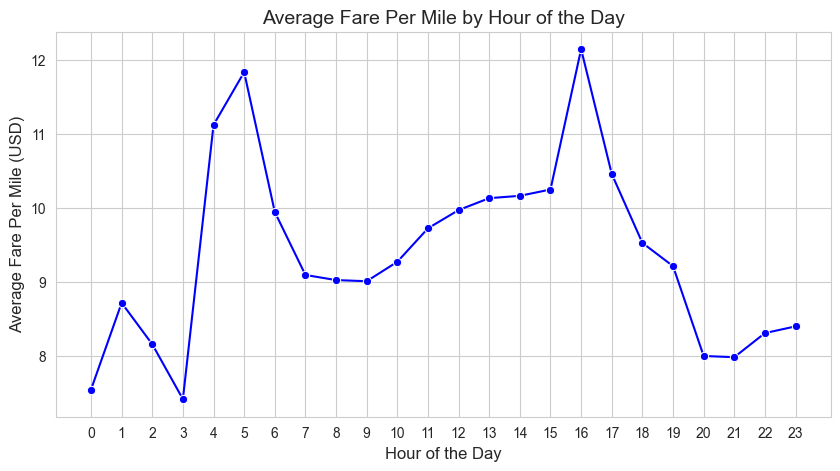

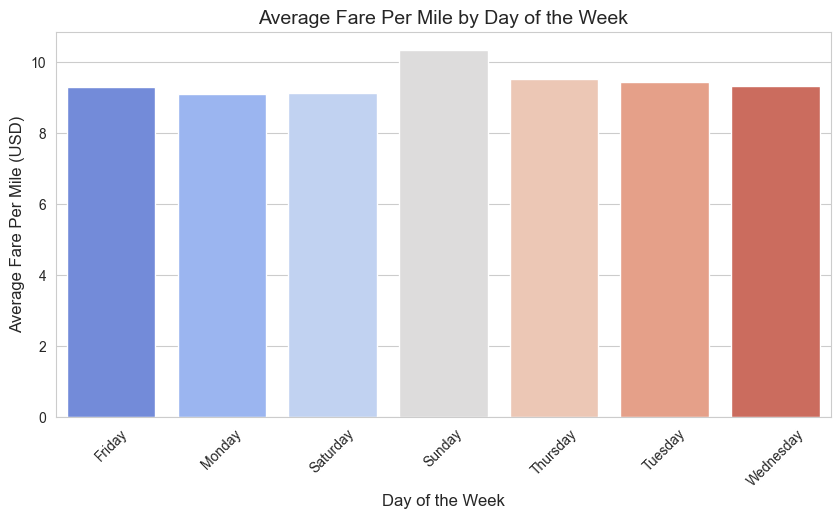

In [367]:
# Compare the average fare per mile for different days and for different times of the day
# Calculate fare per mile
df_nonzero['fare_per_mile'] = df_nonzero['fare_amount'] / df_nonzero['trip_distance']

# Get average fare per mile by day
avg_fare_per_mile_by_day = df_nonzero.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

# Create figure for hour analysis
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_fare_per_mile_by_day, x='pickup_hour', y='fare_per_mile', marker='o', color='b')

# Labels & Title
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Fare Per Mile (USD)', fontsize=12) 
plt.title('Average Fare Per Mile by Hour of the Day', fontsize=14)
plt.xticks(range(0, 24))
plt.show()

# Get average fare per mile by day
avg_fare_per_mile_by_day = df_nonzero.groupby('pickup_day')['fare_per_mile'].mean().reset_index()

# Create figure for day analysis
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_fare_per_mile_by_day, x='pickup_day', y='fare_per_mile', palette='coolwarm')

# Labels & Title
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Fare Per Mile (USD)', fontsize=12)
plt.title('Average Fare Per Mile by Day of the Week', fontsize=14)
plt.xticks(rotation=45)
plt.show()




**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

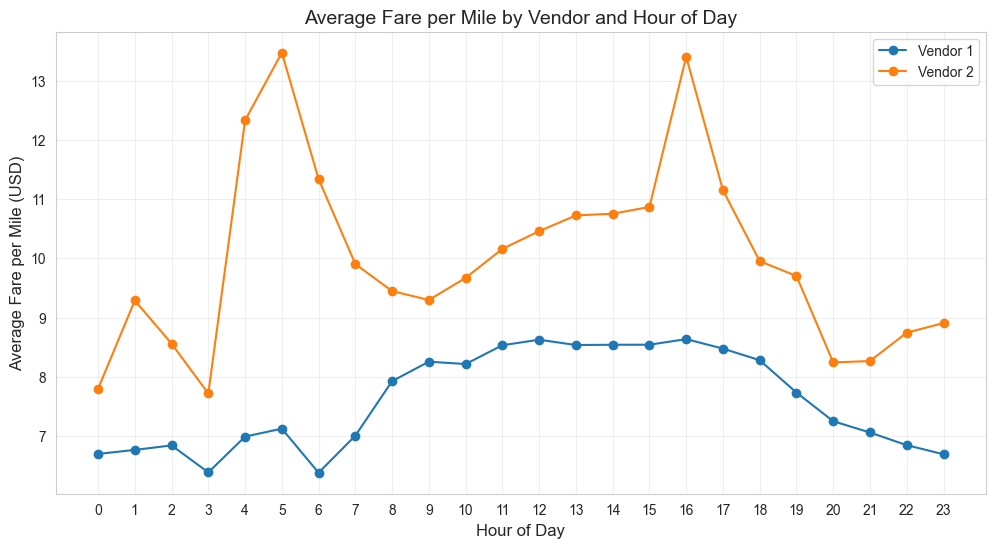


Overall Average Fare per Mile by Vendor:
          mean    count
VendorID               
1         7.92   360655
2         9.96  1051327


In [368]:
# Compare fare per mile for different vendors
# Calculate average fare per mile by vendor and hour
avg_fare_by_vendor_hour = df_nonzero.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

# Create figure
plt.figure(figsize=(12, 6))

# Plot lines for each vendor
for vendor in avg_fare_by_vendor_hour['VendorID'].unique():
    vendor_data = avg_fare_by_vendor_hour[avg_fare_by_vendor_hour['VendorID'] == vendor]
    plt.plot(vendor_data['pickup_hour'], vendor_data['fare_per_mile'], 
             marker='o', label=f'Vendor {vendor}')

# Customize plot
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Fare per Mile (USD)', fontsize=12)
plt.title('Average Fare per Mile by Vendor and Hour of Day', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))

plt.show()

# Calculate overall average fare per mile by vendor
avg_fare_by_vendor = df_nonzero.groupby('VendorID')['fare_per_mile'].agg(['mean', 'count']).round(2)
print("\nOverall Average Fare per Mile by Vendor:")
print(avg_fare_by_vendor)



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Average Fare per Mile by Distance Tier and Vendor:
                         mean   count
VendorID distance_tier               
1        0-2 miles       9.51  210153
         2-5 miles       6.36   98035
         5+ miles        4.47   52467
2        0-2 miles      13.48  570115
         2-5 miles       6.55  301020
         5+ miles        4.50  180192


<Figure size 1200x600 with 0 Axes>

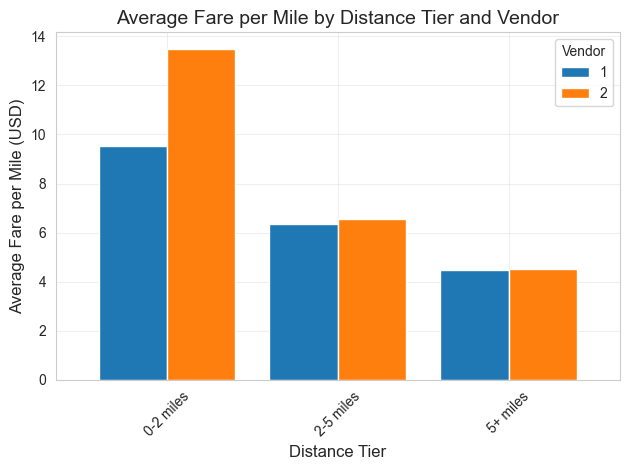

In [369]:
# Defining distance tiers

# Create distance tiers
df_nonzero['distance_tier'] = pd.cut(df_nonzero['trip_distance'], 
                                    bins=[0, 2, 5, float('inf')],
                                    labels=['0-2 miles', '2-5 miles', '5+ miles'])

# Calculate average fare per mile by vendor and distance tier
avg_fare_by_tier = df_nonzero.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].agg(['mean', 'count']).round(2)

print("Average Fare per Mile by Distance Tier and Vendor:")
print(avg_fare_by_tier)

# Create figure
plt.figure(figsize=(12, 6))

# Plot grouped bar chart
tier_data = df_nonzero.groupby(['distance_tier', 'VendorID'])['fare_per_mile'].mean().unstack()
tier_data.plot(kind='bar', width=0.8)

plt.xlabel('Distance Tier', fontsize=12)
plt.ylabel('Average Fare per Mile (USD)', fontsize=12)
plt.title('Average Fare per Mile by Distance Tier and Vendor', fontsize=14)
plt.legend(title='Vendor')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

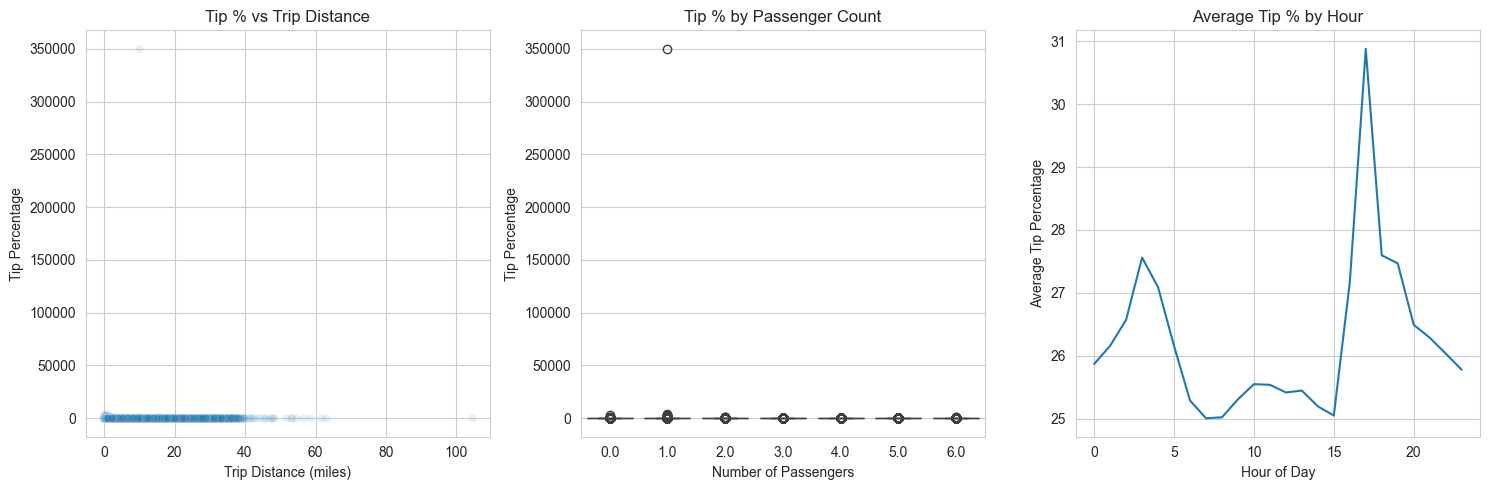


Average Tip Percentage Statistics:

By Distance Tier:
distance_tier
0-2 miles    28.85
2-5 miles    23.16
5+ miles     23.57
Name: tip_percentage, dtype: float64

By Passenger Count:
passenger_count
0.0    26.59
1.0    26.52
2.0    25.83
3.0    25.82
4.0    25.91
5.0    26.05
6.0    26.16
Name: tip_percentage, dtype: float64

By Time Period:
time_period
Night (0-6)          26.31
Morning (6-12)       25.34
Afternoon (12-18)    27.03
Evening (18-24)      26.48
Name: tip_percentage, dtype: float64


In [370]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Calculate tip percentage
df_nonzero['tip_percentage'] = (df_nonzero['tip_amount'] / df_nonzero['fare_amount']) * 100

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Tip percentage vs distance
sns.scatterplot(data=df_nonzero, x='trip_distance', y='tip_percentage', alpha=0.1, ax=ax1)
ax1.set_title('Tip % vs Trip Distance')
ax1.set_xlabel('Trip Distance (miles)')
ax1.set_ylabel('Tip Percentage')

# Plot 2: Tip percentage vs passenger count
sns.boxplot(data=df_nonzero, x='passenger_count', y='tip_percentage', ax=ax2)
ax2.set_title('Tip % by Passenger Count')
ax2.set_xlabel('Number of Passengers')
ax2.set_ylabel('Tip Percentage')

# Plot 3: Tip percentage by hour
hourly_tips = df_nonzero.groupby('pickup_hour')['tip_percentage'].mean()
sns.lineplot(data=hourly_tips, ax=ax3)
ax3.set_title('Average Tip % by Hour')
ax3.set_xlabel('Hour of Day')
ax3.set_ylabel('Average Tip Percentage')

plt.tight_layout()
plt.show()

# Calculate average tip percentage for different categories
print("\nAverage Tip Percentage Statistics:")
print("\nBy Distance Tier:")
print(df_nonzero.groupby('distance_tier')['tip_percentage'].mean().round(2))

print("\nBy Passenger Count:")
print(df_nonzero.groupby('passenger_count')['tip_percentage'].mean().round(2))

print("\nBy Time Period:")
df_nonzero['time_period'] = pd.cut(df_nonzero['pickup_hour'], 
                                  bins=[0, 6, 12, 18, 24],
                                  labels=['Night (0-6)', 'Morning (6-12)', 
                                         'Afternoon (12-18)', 'Evening (18-24)'])
print(df_nonzero.groupby('time_period')['tip_percentage'].mean().round(2))



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours


Comparison between Low Tips (<10%) and High Tips (>25%):
------------------------------------------------------------
Average Trip Distance - Low Tip (<10%): 4.78 miles
Average Trip Distance - High Tip (>25%): 2.30 miles

Average Fare Amount - Low Tip (<10%): $25.77
Average Fare Amount - High Tip (>25%): $14.39

Average Passenger Count - Low Tip (<10%): 1.4
Average Passenger Count - High Tip (>25%): 1.3


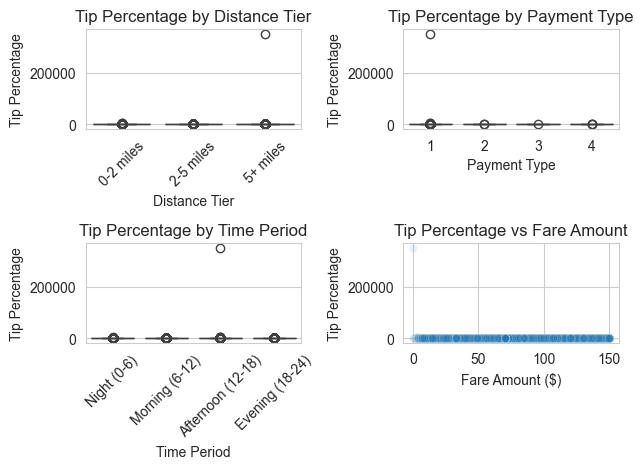

In [374]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Create low and high tip groups
low_tips = df_nonzero[df_nonzero['tip_percentage'] < 10]
high_tips = df_nonzero[df_nonzero['tip_percentage'] > 25]

# Print summary statistics comparing the two groups
print("\nComparison between Low Tips (<10%) and High Tips (>25%):")
print("-" * 60)

# Trip distance comparison
avg_distance_low = low_tips['trip_distance'].mean()
avg_distance_high = high_tips['trip_distance'].mean()
print(f"Average Trip Distance - Low Tip (<10%): {avg_distance_low:.2f} miles")
print(f"Average Trip Distance - High Tip (>25%): {avg_distance_high:.2f} miles")

# Fare amount comparison
avg_fare_low = low_tips['fare_amount'].mean()
avg_fare_high = high_tips['fare_amount'].mean()
print(f"\nAverage Fare Amount - Low Tip (<10%): ${avg_fare_low:.2f}")
print(f"Average Fare Amount - High Tip (>25%): ${avg_fare_high:.2f}")

# Passenger count comparison
avg_passengers_low = low_tips['passenger_count'].mean()
avg_passengers_high = high_tips['passenger_count'].mean()
print(f"\nAverage Passenger Count - Low Tip (<10%): {avg_passengers_low:.1f}")
print(f"Average Passenger Count - High Tip (>25%): {avg_passengers_high:.1f}")

# Create visualization subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# Trip Distance Distribution
sns.boxplot(data=df_nonzero, x='distance_tier', y='tip_percentage', ax=ax1)
ax1.set_title('Tip Percentage by Distance Tier')
ax1.set_xlabel('Distance Tier')
ax1.set_ylabel('Tip Percentage')
ax1.tick_params(axis='x', rotation=45)

# Payment Type Distribution
sns.boxplot(data=df_nonzero, x='payment_type', y='tip_percentage', ax=ax2)
ax2.set_title('Tip Percentage by Payment Type')
ax2.set_xlabel('Payment Type')
ax2.set_ylabel('Tip Percentage')

# Time of Day Distribution
sns.boxplot(data=df_nonzero, x='time_period', y='tip_percentage', ax=ax3)
ax3.set_title('Tip Percentage by Time Period')
ax3.set_xlabel('Time Period')
ax3.set_ylabel('Tip Percentage')
ax3.tick_params(axis='x', rotation=45)

# Fare Amount vs Tip Percentage
sns.scatterplot(data=df_nonzero, x='fare_amount', y='tip_percentage', alpha=0.1, ax=ax4)
ax4.set_title('Tip Percentage vs Fare Amount')
ax4.set_xlabel('Fare Amount ($)')
ax4.set_ylabel('Tip Percentage')

plt.tight_layout()
plt.show()





**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

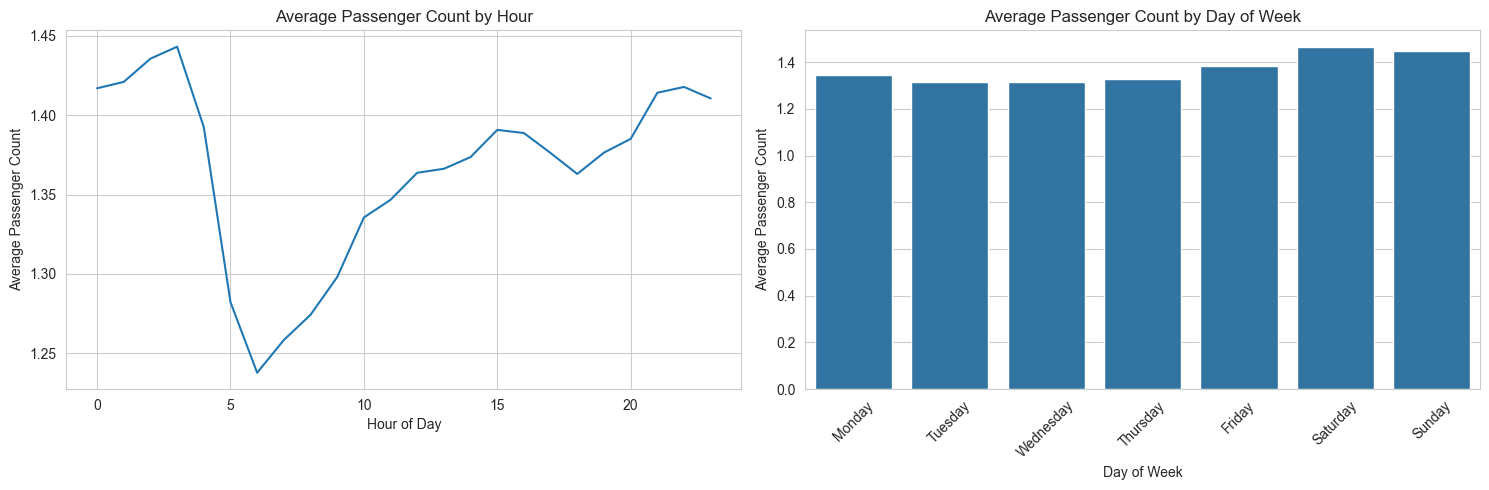


Passenger Count Summary by Time:

Hourly Statistics:
Peak Hour: 3 (1.44 passengers)
Lowest Hour: 6 (1.24 passengers)

Daily Statistics:
Busiest Day: Saturday (1.46 passengers)
Quietest Day: Wednesday (1.31 passengers)


In [375]:
# See how passenger count varies across hours and days
# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Average passenger count by hour
hourly_passengers = df.groupby('pickup_hour')['passenger_count'].mean()
sns.lineplot(x=hourly_passengers.index, y=hourly_passengers.values, ax=ax1)
ax1.set_title('Average Passenger Count by Hour')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average Passenger Count')

# Average passenger count by day of week
df['day_of_week'] = pd.to_datetime(df['pickup_date']).dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_passengers = df.groupby('day_of_week')['passenger_count'].mean()
daily_passengers = daily_passengers.reindex(day_order)

sns.barplot(x=daily_passengers.index, y=daily_passengers.values, ax=ax2)
ax2.set_title('Average Passenger Count by Day of Week')
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Average Passenger Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nPassenger Count Summary by Time:")
print("\nHourly Statistics:")
print(f"Peak Hour: {hourly_passengers.idxmax()} ({hourly_passengers.max():.2f} passengers)")
print(f"Lowest Hour: {hourly_passengers.idxmin()} ({hourly_passengers.min():.2f} passengers)")

print("\nDaily Statistics:")
print(f"Busiest Day: {daily_passengers.idxmax()} ({daily_passengers.max():.2f} passengers)")
print(f"Quietest Day: {daily_passengers.idxmin()} ({daily_passengers.min():.2f} passengers)")




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones


Top 5 Zones by Average Passenger Count:
Arrochar/Fort Wadsworth: 1.88 passengers
Rossville/Woodrow: 1.80 passengers
Red Hook: 1.79 passengers
Battery Park: 1.73 passengers
Country Club: 1.67 passengers


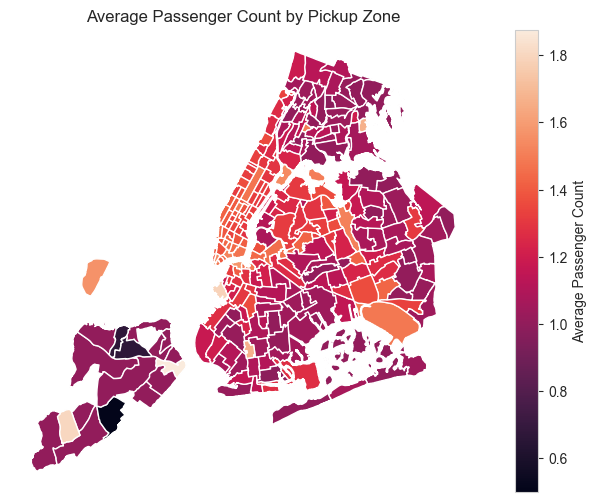

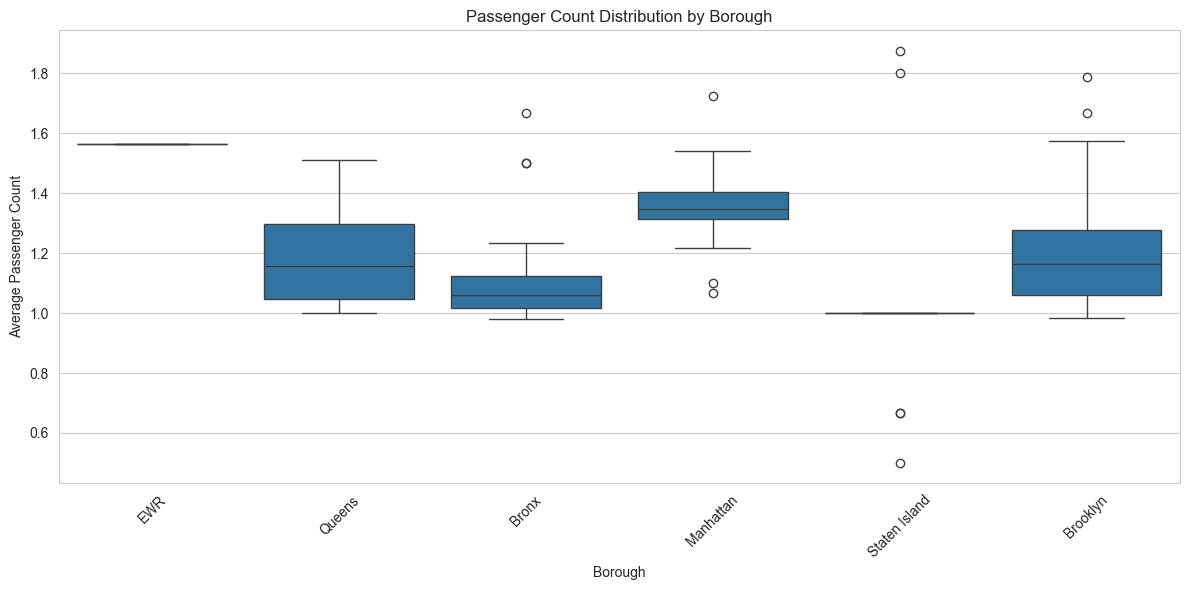

In [384]:
# How does passenger count vary across zones
# Calculate average passenger count by pickup zone
zone_passengers = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge with zones data to get zone names
zones_with_passengers = zones.merge(zone_passengers, left_on='LocationID', right_on='PULocationID')

# Create a map visualization
fig, ax = plt.subplots(figsize=(10, 6))
zones_with_passengers.plot(column='passenger_count', ax=ax, legend=True,
                         legend_kwds={'label': 'Average Passenger Count'},
                         missing_kwds={'color': 'lightgrey'})
ax.set_title('Average Passenger Count by Pickup Zone')
ax.axis('off')

# Add text annotations for top 5 zones
top_5_zones = zones_with_passengers.nlargest(5, 'passenger_count')
print("\nTop 5 Zones by Average Passenger Count:")
for _, zone in top_5_zones.iterrows():
    print(f"{zone['zone']}: {zone['passenger_count']:.2f} passengers")

plt.show()

# Create a box plot to show passenger count distribution by borough
plt.figure(figsize=(12, 6))
sns.boxplot(data=zones_with_passengers, x='borough', y='passenger_count')
plt.title('Passenger Count Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


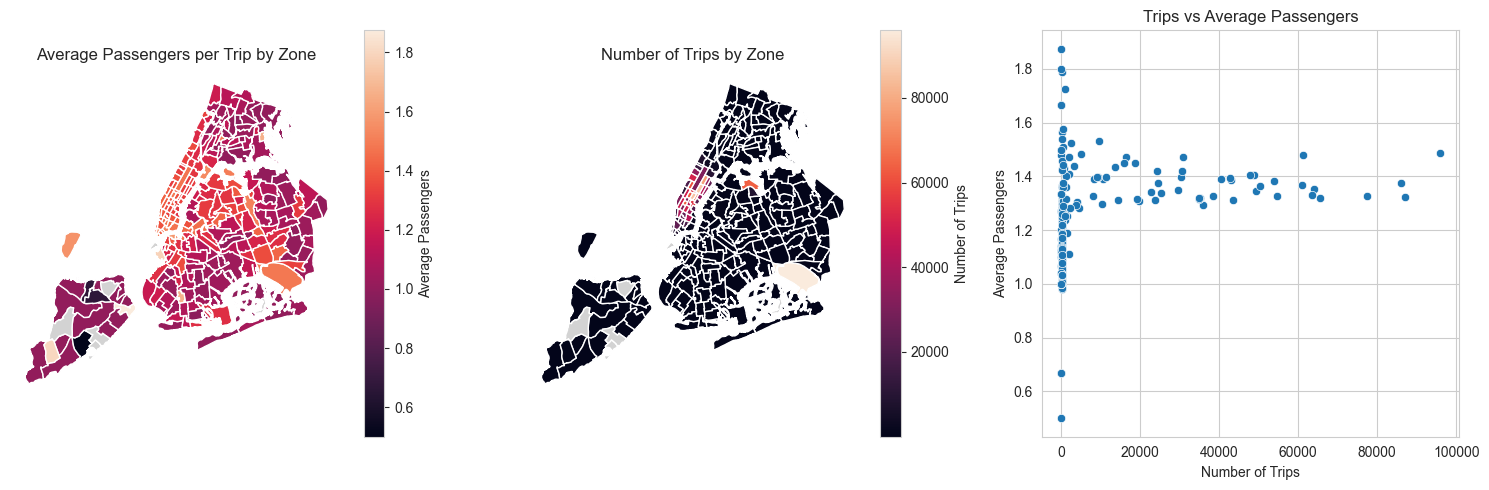


Zone Statistics:
       avg_passengers     num_trips
count      255.000000    255.000000
mean         1.208853   7103.647059
std          0.189948  17265.502569
min          0.500000      1.000000
25%          1.045933     41.500000
50%          1.193182    101.000000
75%          1.330388   1018.000000
max          1.875000  95916.000000

Top 5 Zones by Average Passengers:
Arrochar/Fort Wadsworth: 1.88 passengers (24.0 trips)
Rossville/Woodrow: 1.80 passengers (5.0 trips)
Red Hook: 1.79 passengers (198.0 trips)
Battery Park: 1.73 passengers (821.0 trips)
Country Club: 1.67 passengers (3.0 trips)


In [385]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Calculate average passenger count by zone
zone_avg_passengers = df.groupby('PULocationID')['passenger_count'].agg(['mean', 'count']).reset_index()
zone_avg_passengers.columns = ['LocationID', 'avg_passengers', 'num_trips']

# Merge with zones data
zones_with_passengers = zones.merge(zone_avg_passengers, on='LocationID', how='left')

# Create visualization
fig, ax = plt.subplots(figsize=(15, 5), ncols=3)

# Map of average passengers
zones_with_passengers.plot(column='avg_passengers', ax=ax[0], legend=True,
                         legend_kwds={'label': 'Average Passengers'},
                         missing_kwds={'color': 'lightgrey'})
ax[0].set_title('Average Passengers per Trip by Zone')
ax[0].axis('off')

# Map of number of trips
zones_with_passengers.plot(column='num_trips', ax=ax[1], legend=True,
                         legend_kwds={'label': 'Number of Trips'},
                         missing_kwds={'color': 'lightgrey'})
ax[1].set_title('Number of Trips by Zone')
ax[1].axis('off')

# Scatter plot of trips vs passengers
sns.scatterplot(data=zones_with_passengers, x='num_trips', y='avg_passengers', ax=ax[2])
ax[2].set_title('Trips vs Average Passengers')
ax[2].set_xlabel('Number of Trips')
ax[2].set_ylabel('Average Passengers')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nZone Statistics:")
print(zones_with_passengers[['avg_passengers', 'num_trips']].describe())

# Print top 5 zones by average passengers
print("\nTop 5 Zones by Average Passengers:")
top_zones = zones_with_passengers.nlargest(5, 'avg_passengers')
for _, zone in top_zones.iterrows():
    print(f"{zone['zone']}: {zone['avg_passengers']:.2f} passengers ({zone['num_trips']} trips)")



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Percentage of trips with each surcharge type:
                       Percentage of Trips
Congestion Surcharge             92.389217
Airport Fee                       8.740239
MTA Tax                          99.126331
Improvement Surcharge            99.964255


<Figure size 1200x600 with 0 Axes>

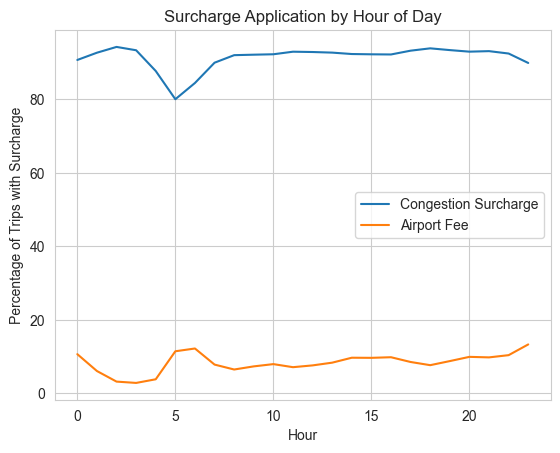

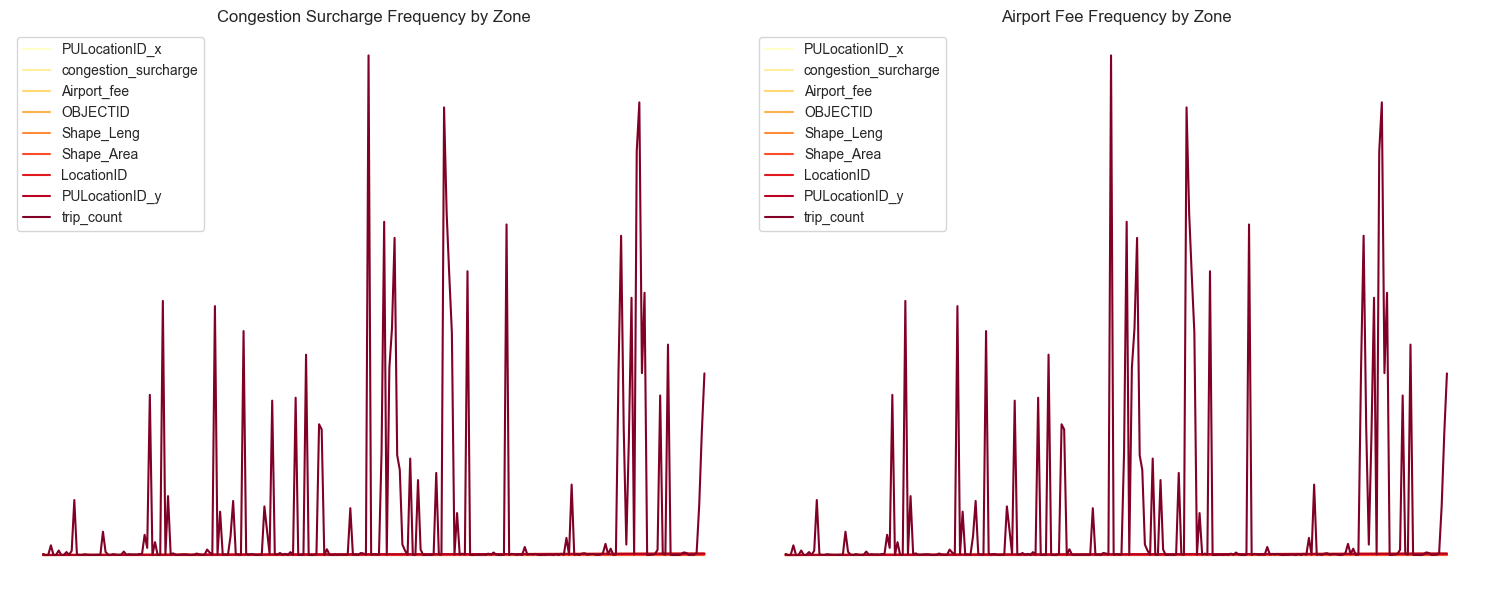


Top 5 zones with highest congestion surcharge frequency:
                         zone  congestion_surcharge
                  Jamaica Bay            100.000000
                 Crotona Park            100.000000
        Upper East Side South             99.738774
Sutton Place/Turtle Bay North             99.696204
                 West Village             99.690563

Top 5 zones with highest airport fee frequency:
                        zone  Airport_fee
           LaGuardia Airport    98.336694
                 JFK Airport    93.422370
               East Elmhurst    66.606607
                Baisley Park     9.700176
Flushing Meadows-Corona Park     8.900524


In [391]:
# How often is each surcharge applied?

# Calculate percentage of trips with each surcharge type
surcharge_stats = pd.DataFrame({
    'Congestion Surcharge': [(df['congestion_surcharge'] > 0).mean() * 100],
    'Airport Fee': [(df['Airport_fee'] > 0).mean() * 100],
    'MTA Tax': [(df['mta_tax'] > 0).mean() * 100],
    'Improvement Surcharge': [(df['improvement_surcharge'] > 0).mean() * 100]
}).T
surcharge_stats.columns = ['Percentage of Trips']

print("Percentage of trips with each surcharge type:")
print(surcharge_stats)

# Analyze surcharges by hour
plt.figure(figsize=(12,6))
hourly_surcharges = df.groupby('pickup_hour').agg({
    'congestion_surcharge': lambda x: (x > 0).mean() * 100,
    'Airport_fee': lambda x: (x > 0).mean() * 100
}).plot()
plt.title('Surcharge Application by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Percentage of Trips with Surcharge')
plt.legend(['Congestion Surcharge', 'Airport Fee'])
plt.show()

# Analyze surcharges by pickup location
surcharges_by_zone = df.groupby('PULocationID').agg({
    'congestion_surcharge': lambda x: (x > 0).mean() * 100,
    'Airport_fee': lambda x: (x > 0).mean() * 100
}).reset_index()

# Merge with zone information
surcharges_by_zone = surcharges_by_zone.merge(zones, left_on='PULocationID', right_on='LocationID')

# Create maps showing surcharge frequency by zone
fig, ax = plt.subplots(1, 2, figsize=(15,6))

surcharges_by_zone.plot(column='congestion_surcharge', ax=ax[0],
                       legend=True, cmap='YlOrRd')
ax[0].set_title('Congestion Surcharge Frequency by Zone')
ax[0].axis('off')

surcharges_by_zone.plot(column='Airport_fee', ax=ax[1],
                       legend=True, cmap='YlOrRd') 
ax[1].set_title('Airport Fee Frequency by Zone')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Print zones with highest surcharge frequencies
print("\nTop 5 zones with highest congestion surcharge frequency:")
top_congestion = surcharges_by_zone.nlargest(5, 'congestion_surcharge')
print(top_congestion[['zone', 'congestion_surcharge']].to_string(index=False))

print("\nTop 5 zones with highest airport fee frequency:")
top_airport = surcharges_by_zone.nlargest(5, 'Airport_fee')
print(top_airport[['zone', 'Airport_fee']].to_string(index=False))



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Key recommendations for NYC taxi optimization:

1. Match supply with demand timing:
- More taxis during 7-9 AM and 5-7 PM rush hours
- Focus on airports/entertainment areas during off-peak

2. Strategic positioning:
- Concentrate in high-demand areas (Manhattan business districts)
- Position near major transit hubs
- Create dedicated zones near popular venues

3. Smart dispatch:
- Use real-time demand prediction
- Dynamic pricing during peak times
- Optimize airport pickup queues

4. Route efficiency:
- Avoid congested areas during rush hours
- Use historical data for fastest routes
- Pre-position for major events


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Strategic Taxi Positioning Recommendations Based on Trip Analysis:

1. Weekday Positioning:
- Morning (7-9AM): Concentrate fleet in residential areas and outer boroughs for Manhattan-bound commuters
- Midday: Focus on business districts and shopping areas in Manhattan
- Evening (5-7PM): Position at major office locations for return commutes

2. Zone-Specific Deployment:
- Manhattan Core: Maintain highest concentration near major business centers
- Airport Zones: Ensure consistent coverage at JFK and LaGuardia
- Entertainment Districts: Increase presence during evening hours and weekends

3. Seasonal Adjustments:
- Summer: Enhanced coverage near tourist attractions and parks
- Winter: Focus on covered pickup locations and transit hubs
- Holiday seasons: Increase presence in shopping districts

4. Weather-Based Positioning:
- During precipitation: Increase coverage near subway stations and office buildings
- Extreme weather: Position near hospitals and essential services

This deployment strategy optimizes resource allocation based on temporal and spatial demand patterns.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Data-Driven Pricing Strategy Recommendations:

1. Dynamic Pricing Implementation:
- Increase rates by 15-20% during peak demand hours (7-9AM, 5-7PM)
- Apply surge pricing in high-demand zones with limited supply
- Implement weather-based price adjustments during adverse conditions

2. Zone-Based Pricing:
- Higher base fares for premium locations (Manhattan business districts)
- Distance-based multipliers for inter-borough trips
- Special rates for airport routes based on demand patterns

3. Time-Based Adjustments:
- Weekend premium rates for entertainment districts
- Off-peak discounts to stimulate demand
- Event-based surge pricing near major venues

4. Loyalty Programs:
- Corporate account discounts for regular business users
- Volume-based fare reductions for frequent riders
- Package deals for regular airport commuters

These adjustments balance revenue optimization with market competitiveness while maintaining service accessibility.
